In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from typing import List, Tuple

In [4]:
# Custom functions
from some_functions import merge_without_suffixes, normalize_by_production, get_info_for_ids, create_sankey_diagram, get_production_data

In [5]:
metallican_path = r'C:\Users\mp_ma\OneDrive - polymtlus\Desktop\POST_DOC\Project\canada_metal_sustainability_db'

# Import MetalliCan tables

In [6]:
main_table = pd.read_csv(metallican_path + r'\database\CSV\main_table.csv')
production_table = pd.read_csv(metallican_path + r'\database\CSV\production_table.csv')
tech_attributes_table = pd.read_csv(metallican_path + r'\database\CSV\tech_attributes_table.csv')
env_table = pd.read_csv(metallican_path + r'\database\CSV\environmental_flows_table.csv')
technosphere_table = pd.read_csv(metallican_path + r'\database\CSV\materials_energy_table.csv')
archetypes_table = pd.read_csv(metallican_path + r'\database\CSV\archetypes_table.csv')
land_table = pd.read_csv(metallican_path + r'\database\CSV\land_occupation_table.csv')
intensity_table = pd.read_csv(metallican_path + r'\database\CSV\intensity_table.csv')
waste_table = pd.read_table(metallican_path + r'\database\CSV\waste_table.csv', sep=',')

## Small data cleaning

In [7]:
intensity_table_nrj = intensity_table[intensity_table['type'] == 'Energy']

In [8]:
# Remove rows that start with INT-CMP
intensity_table_nrj = intensity_table_nrj[~intensity_table_nrj['intensity_id'].str.startswith('INT-CMP')]

In [9]:
intensity_table_nrj

,intensity_id,year,commodity,type,subtype,unit,value,comment,main_id,facility_group_id,company_id,source_id
103,INT-e7e6a960-2023-3,2023,Gold,Energy,Electricity intensity,kWh/t ore processed,32.670089,NaN,QC-MAIN-e7e6a960,NaN,CMP-6265c407,SRC_AgnicoEagleMinesLimited_2023-Sustainabilit...
104,INT-e7e6a960-2023-4,2023,Gold,Energy,Energy intensity,GJ/t ore processed,0.285353,NaN,QC-MAIN-e7e6a960,NaN,CMP-6265c407,SRC_AgnicoEagleMinesLimited_2023-Sustainabilit...
105,INT-GRP-0a2c0d69-2023-3,2023,Gold,Energy,Electricity intensity,kWh/t ore processed,42.900000,NaN,NaN,GRP-0a2c0d69,CMP-6265c407,SRC_AgnicoEagleMinesLimited_2023-Sustainabilit...
106,INT-GRP-0a2c0d69-2023-4,2023,Gold,Energy,Energy intensity,GJ/t ore processed,0.960000,NaN,NaN,GRP-0a2c0d69,CMP-6265c407,SRC_AgnicoEagleMinesLimited_2023-Sustainabilit...
107,INT-aeafbb59-2023-3,2023,Gold,Energy,Electricity intensity,kWh/t ore processed,69.186686,NaN,ON-MAIN-aeafbb59,NaN,CMP-6265c407,SRC_AgnicoEagleMinesLimited_2023-Sustainabilit...
108,INT-aeafbb59-2023-4,2023,Gold,Energy,Energy intensity,GJ/t ore processed,1.025808,NaN,ON-MAIN-aeafbb59,NaN,CMP-6265c407,SRC_AgnicoEagleMinesLimited_2023-Sustainabilit...
109,INT-1f126a43-2023-3,2023,"Gold, silver",Energy,Electricity intensity,kWh/t ore processed,34.423417,NaN,ON-MAIN-1f126a43,NaN,CMP-6265c407,SRC_AgnicoEagleMinesLimited_2023-Sustainabilit...
110,INT-1f126a43-2023-4,2023,"Gold, silver",Energy,Energy intensity,GJ/t ore processed,0.265029,NaN,ON-MAIN-1f126a43,NaN,CMP-6265c407,SRC_AgnicoEagleMinesLimited_2023-Sustainabilit...
111,INT-8b0264c9-2023-3,2023,"Gold, silver",Energy,Electricity intensity,kWh/t ore processed,61.976532,NaN,NU-MAIN-8b0264c9,NaN,CMP-6265c407,SRC_AgnicoEagleMinesLimited_2023-Sustainabilit...
112,INT-8b0264c9-2023-4,2023,"Gold, silver",Energy,Energy intensity,GJ/t ore processed,0.302121,NaN,NU-MAIN-8b0264c9,NaN,CMP-6265c407,SRC_AgnicoEagleMinesLimited_2023-Sustainabilit...


# Create samples based on the best available data

In [10]:
ids_production = set(production_table[['main_id', 'facility_group_id']].apply(tuple, axis=1))
ids_ta = set(tech_attributes_table[['main_id', 'facility_group_id']].apply(tuple, axis=1))
ids_environmental = set(env_table[['main_id', 'facility_group_id']].apply(tuple, axis=1))
ids_technosphere = set(technosphere_table[['main_id', 'facility_group_id']].apply(tuple, axis=1))
ids_archetypes = set(archetypes_table[['main_id', 'facility_group_id']].apply(tuple, axis=1))
ids_intensity = set(intensity_table_nrj[['main_id', 'facility_group_id']].apply(tuple, axis=1))
ids_waste = set(waste_table[['main_id', 'facility_group_id']].apply(tuple, axis=1))
ids_land = set(land_table[['main_id']].apply(tuple, axis=1))

In [11]:
# Print the lens of each set
print(f"Production: {len(ids_production)}, TA: {len(ids_ta)}, Environmental: {len(ids_environmental)}, Technosphere: {len(ids_technosphere)}, Archetypes: {len(ids_archetypes)}, Intensity: {len(ids_intensity)}, Waste: {len(ids_waste)}, Land: {len(ids_land)}")

Production: 95, TA: 38, Environmental: 128, Technosphere: 33, Archetypes: 84, Intensity: 14, Waste: 27, Land: 116


In [12]:
# Find the intersection of these sets to get common IDs
best_ids = ids_production & ids_ta & ids_environmental & ids_technosphere
env_ids = ids_production & ids_environmental
technosphere_ids = ids_production & ids_technosphere
waste_ids = ids_production & ids_waste

In [13]:
# Print the lend of each set
print(f"Best IDs (best, env, techosphere, waste): {len(best_ids), len(env_ids), len(technosphere_ids), len(waste_ids)}")

Best IDs (best, env, techosphere, waste): (26, 76, 30, 25)


In [14]:
main_best_df = get_info_for_ids(main_table, best_ids)
main_env_df = get_info_for_ids(main_table, env_ids)
main_technosphere_df = get_info_for_ids(main_table, technosphere_ids)
main_waste_df = get_info_for_ids(main_table, waste_ids)

In [15]:
# Export the best and second best IDs to Excel
with pd.ExcelWriter(r'data\MetalliCan\sample_ids.xlsx') as writer:
    main_best_df.to_excel(writer, sheet_name='best', index=False)
    main_env_df.to_excel(writer, sheet_name='biosphere', index=False)
    main_technosphere_df.to_excel(writer, sheet_name='technosphere', index=False)

# Calculation possibilities

## Summarize calculation possibilities

In [53]:
def summarize_calculation_possibilities(prod_df, tech_df):
    """
    Generate a summary per main_id and commodity with:
    - number of production and technical rows
    - list of material types in each
    - calculation possibilities
    """
    # Filter valid main_id
    prod_df = prod_df.copy()
    tech_df = tech_df.copy()

    prod_df = prod_df[prod_df['main_id'].notna() & (prod_df['main_id'] != '-')]
    tech_df = tech_df[tech_df['main_id'].notna() & (tech_df['main_id'] != '-')]

    # Normalize columns
    for df in [prod_df, tech_df]:
        df['material_type'] = df['material_type'].astype(str).str.lower().str.strip()
        df['commodity'] = df['commodity'].astype(str).str.strip().str.lower()

    # Group production
    prod_summary = prod_df.groupby(['main_id', 'commodity']).agg(
        production_rows=('material_type', 'count'),
        production_material_types=('material_type', lambda x: sorted(set(x.dropna())))
    ).reset_index()

    # Group technical attributes
    tech_summary = tech_df.groupby(['main_id', 'commodity']).agg(
        tech_rows=('material_type', 'count'),
        technical_material_types=('material_type', lambda x: sorted(set(x.dropna())))
    ).reset_index()

    # Merge summaries
    merged = pd.merge(prod_summary, tech_summary, on=['main_id', 'commodity'], how='inner')

    # Define rules
    def infer_calc(prod_types, tech_types):
        result = []
        prod_set = set(prod_types)
        tech_set = set(tech_types)

        if (
            any("ore processed" in pt or "crude ore" in pt or "usable ore" in pt for pt in prod_set) and
            any("grade" in tt for tt in tech_set) and
            any("recovery" in tt for tt in tech_set)
        ):
            result.append("calculate contained metal in concentrate")

        if "contained metal in concentrate" in prod_set and "concentrate grade" in tech_set:
            result.append("back-calculate concentrate mass")

        if (
            any("ore processed" in pt for pt in prod_set) and
            any("grade" in tt for tt in tech_set)
        ):
            result.append("calculate contained metal in ore")

        if (
            "contained metal in concentrate" in prod_set and
            any("grade" in tt for tt in tech_set) and
            any("ore processed" in pt for pt in prod_set)
        ):
            result.append("back-calculate recovery rate")

        return result if result else ["insufficient combination"]

    # Apply rule
    merged["calculation_possible"] = merged.apply(
        lambda row: infer_calc(row['production_material_types'], row['technical_material_types']),
        axis=1
    )
    return merged

In [55]:
def calculate_inferred_rows(prod_df, tech_df):
    """
    For each main_id and commodity where inference is possible:
    - Adds rows to production_df and technical_df with 'Calculated' method
    - Calculates values using value_tonnes, grade, and recovery
    - Fills reference_point appropriately
    """

    # Make copies
    prod_df = prod_df.copy()
    tech_df = tech_df.copy()

    # Normalize
    for df in [prod_df, tech_df]:
        df['material_type'] = df['material_type'].astype(str).str.lower().str.strip()
        df['commodity'] = df['commodity'].astype(str).str.lower().str.strip()
        df['unit'] = df['unit'].astype(str).str.strip().str.lower()

    # Filter valid rows
    prod_df = prod_df[prod_df['main_id'].notna() & (prod_df['main_id'] != '-')]
    tech_df = tech_df[tech_df['main_id'].notna() & (tech_df['main_id'] != '-')]

    # Create inferred rows
    inferred_rows_prod = []
    inferred_rows_tech = []

    # Group by facility and commodity
    grouped = prod_df.groupby(['main_id', 'commodity'])
    for (main_id, commodity), group in grouped:
        tech_sub = tech_df[(tech_df['main_id'] == main_id) & (tech_df['commodity'] == commodity)]

        # Get ore processed
        ore_row = group[group['material_type'].isin(['ore processed', 'usable ore'])]
        if ore_row.empty:
            continue
        ore_val = ore_row['value_tonnes'].iloc[0]

        # Get grade
        grade_row = tech_sub[tech_sub['material_type'].str.contains('grade')]
        if grade_row.empty:
            continue
        grade_val = grade_row['value'].iloc[0]
        if grade_row['unit'].iloc[0] == '%':
            grade_val /= 100
        elif grade_row['unit'].iloc[0] == 'g/t':
            grade_val /= 1e6  # g/t to fraction

        # Get recovery
        rec_row = tech_sub[tech_sub['material_type'].str.contains('recovery')]
        if rec_row.empty:
            continue
        rec_val = rec_row['value'].iloc[0] / 100

        # CALCULATE: contained metal in concentrate
        metal_val = ore_val * grade_val * rec_val

        # Inferred production row
        ref_row = ore_row.iloc[0].copy()
        ref_row['material_type'] = 'contained metal in concentrate'
        ref_row['reference_point'] = 'Usable ore'
        ref_row['method'] = 'Calculated'
        ref_row['value'] = pd.NA
        ref_row['value_tonnes'] = metal_val
        inferred_rows_prod.append(ref_row)

        # CALCULATE: contained metal in ore (before recovery)
        metal_in_ore = ore_val * grade_val
        ore_row2 = ore_row.iloc[0].copy()
        ore_row2['material_type'] = 'contained metal in ore'
        ore_row2['reference_point'] = 'Crude ore'
        ore_row2['method'] = 'Calculated'
        ore_row2['value'] = pd.NA
        ore_row2['value_tonnes'] = metal_in_ore
        inferred_rows_prod.append(ore_row2)

        # CALCULATE: inferred recovery rate (to technical_df)
        recovery_row = grade_row.iloc[0].copy()
        recovery_row['material_type'] = 'recovery rate'
        recovery_row['reference_point'] = 'usable ore'
        recovery_row['method'] = 'Calculated'
        recovery_row['unit'] = '%'
        recovery_row['value'] = rec_val * 100
        inferred_rows_tech.append(recovery_row)

    # Append and return
    inferred_prod_df = pd.DataFrame(inferred_rows_prod)
    inferred_tech_df = pd.DataFrame(inferred_rows_tech)
    prod_df_updated = pd.concat([prod_df, inferred_prod_df], ignore_index=True)
    tech_df_updated = pd.concat([tech_df, inferred_tech_df], ignore_index=True)

    return prod_df_updated, tech_df_updated, inferred_prod_df, inferred_tech_df


In [56]:
prod, tech, inf_p, inf_t = calculate_inferred_rows(production_table, tech_attributes_table)

C:\Users\mp_ma\AppData\Local\Temp\ipykernel_26764\2137092810.py:88: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  prod_df_updated = pd.concat([prod_df, inferred_prod_df], ignore_index=True)


# Get the mining method and submethod for the different samples

In [16]:
archetypes_best = get_info_for_ids(archetypes_table, best_ids)[['main_id', 'facility_group_id', 'ore_type', 'mining_method', 'mining_submethod']]
# archetypes_second_best = get_info_for_ids(archetypes_table, second_best_ids)[['main_id', 'facility_group_id', 'ore_type', 'mining_method', 'mining_submethod']]
# archetypes_third_best = get_info_for_ids(archetypes_table, third_best_ids)[['main_id', 'facility_group_id', 'ore_type', 'mining_method', 'mining_submethod']]

In [17]:
best = merge_without_suffixes(main_best_df, archetypes_best, keys=("main_id", "facility_group_id"), how="left")
# second_best = merge_without_suffixes(main_second_best_df, archetypes_second_best, keys=("main_id", "facility_group_id"), how="left")
# third_best = merge_without_suffixes(main_third_best_df, archetypes_third_best, keys=("main_id", "facility_group_id"), how="left")

C:\Users\mp_ma\OneDrive - polymtlus\Desktop\POST_DOC\Project\regionalized_lci_mineral\some_functions.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left[k] = left[k].astype(str)
C:\Users\mp_ma\OneDrive - polymtlus\Desktop\POST_DOC\Project\regionalized_lci_mineral\some_functions.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left[k] = left[k].astype(str)


In [18]:
sankey_best = create_sankey_diagram(best)
sankey_best.write_html(r'data\MetalliCan\sample_best.html', )

In [60]:
import plotly.graph_objects as go

In [68]:
def create_sankey(data):
    """
    Generates a Sankey diagram from the provided DataFrame.

    Args:
        data (pd.DataFrame): A DataFrame containing the raw data.

    Returns:
        plotly.graph_objects.Figure: The generated Sankey figure.
    """
    # Create a copy to avoid modifying the original DataFrame
    df = data.copy()

    # Data cleaning and preparation
    # 1. Clean the 'commodities' column to handle different orderings of the same items.
    #    This ensures "Gold, copper, silver" and "Copper, silver, gold" are treated the same.
    df['commodities_cleaned'] = df['commodities'].apply(
        lambda x: ', '.join(sorted([c.strip().lower() for c in str(x).split(',')])) if pd.notna(x) else 'Unknown Commodities'
    )

    # 2. Define the columns to be used for the Sankey flow
    columns = [
        'commodities_cleaned',
        'province',
        'mining_processing_type',
        #'mining_method',
        #'mining_submethod'
    ]

    # Replace NaN values in the flow columns with a specific 'Unknown' label for each column
    for col in columns:
        # We handle commodities_cleaned separately, so we skip it here.
        if col != 'commodities_cleaned':
            df[col] = df[col].fillna(f'Unknown {col.replace("_", " ").title()}')

    # 3. Apply custom prefixes to ensure uniqueness and readability
    #df['mining_processing_type'] = df['mining_processing_type'].apply(lambda x: f"NRC: {x}")
    df['mining_method'] = df['mining_method'].apply(lambda x: f"MDO: {x}")
    df['mining_submethod'] = df['mining_submethod'].apply(lambda x: f"MDO_s: {x}")

    # Create a list of all unique labels for the nodes
    labels = []
    for col in columns:
        labels.extend(df[col].unique().tolist())

    labels = sorted(list(set(labels)))

    # Create a mapping from label to an index for Plotly
    label_to_index = {label: i for i, label in enumerate(labels)}

    # Initialize lists to store the source, target, and value of each link
    source = []
    target = []
    value = []

    # Iterate through the defined flow path and create the links
    for i in range(len(columns) - 1):
        col1 = columns[i]
        col2 = columns[i+1]

        # Group by the source and target nodes to count the links
        link_counts = df.groupby([col1, col2]).size().reset_index(name='count')

        for _, row in link_counts.iterrows():
            source_label = row[col1]
            target_label = row[col2]
            link_value = row['count']

            # Ensure both source and target labels exist in our map
            if pd.notna(source_label) and pd.notna(target_label):
                source.append(label_to_index[source_label])
                target.append(label_to_index[target_label])
                value.append(link_value)

    # Create the Sankey diagram using plotly
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=25,  # Increased pad for vertical layout
            thickness=25, # Increased thickness for vertical layout
            line=dict(color="black", width=0.5),
            label=labels,
            hovertemplate='%{label}<br>Value: %{value} facilities<extra></extra>'
        ),
        link=dict(
            source=source,
            target=target,
            value=value,
            hovertemplate='From %{source.label}<br>To %{target.label}<br>Count: %{value}<extra></extra>'
        ),
        orientation='h' # Set the orientation to vertical here
    )])

    # Update layout for a better visualization
    fig.update_layout(
        #title_text="Sankey Diagram of Mining Facilities",
        font=dict(size=16),
        plot_bgcolor='white',
        paper_bgcolor='white'
    )

    return fig

In [69]:
sankey_best = create_sankey(best)
sankey_best.write_html(r'results\parametrization\sample_best.html', )

In [127]:
sankey_third = create_sankey_diagram(third_best)
sankey_third.write_html(r'data\MetalliCan\sample_third.html', )

# Create parametrization table for the best IDs

In [20]:
production_df_best = get_info_for_ids(production_table, best_ids)
# production_df_second = get_info_for_ids(production_table,second_best_ids)
# production_df_third = get_info_for_ids(production_table,third_best_ids)

In [21]:
production_df_best = get_production_data(production_df_best)
# production_df_second = get_production_data(production_df_second)
# production_df_third = get_production_data(production_df_third)

In [107]:
ta_best = get_info_for_ids(tech_attributes_table, best_ids)[['main_id', 'facility_group_id', 'commodity', 'material_type', 'unit', 'value']]
# ta_second_best = get_info_for_ids(tech_attributes_table, second_best_ids)[['main_id', 'facility_group_id', 'commodity', 'material_type', 'unit', 'value']]
# ta_third_best = get_info_for_ids(tech_attributes_table, third_best_ids)[['main_id', 'facility_group_id', 'commodity', 'material_type', 'unit', 'value']]

In [108]:
ta_best

,main_id,facility_group_id,commodity,material_type,unit,value
9,QC-MAIN-e7e6a960,NaN,Ore,Strip ratio,waste/ore,1.000141
10,QC-MAIN-e7e6a960,NaN,Gold,Head grade,g/t,1.170000
11,QC-MAIN-e7e6a960,NaN,Gold,Recovery rate,%,92.800000
12,ON-MAIN-aeafbb59,NaN,Ore,Strip ratio,waste/ore,4.327581
13,NaN,GRP-0a2c0d69,Ore,Strip ratio,waste/ore,9.553805
...,...,...,...,...,...,...
125,BC-MAIN-6b4800fe,NaN,Copper,Copper recovery,%,82.600000
126,QC-MAIN-9de9bb0d,NaN,Gold,Head grade,g/t,12.600000
127,QC-MAIN-9de9bb0d,NaN,Gold,Recovery rate,%,96.900000
128,ON-MAIN-c5fefb01,NaN,Gold,Head grade,g/t,5.900000


In [24]:
archetypes_best = get_info_for_ids(archetypes_table, best_ids)[['main_id', 'facility_group_id', 'ore_type', 'mining_method', 'mining_submethod']]
# archetypes_second_best = get_info_for_ids(archetypes_table, second_best_ids)[['main_id', 'facility_group_id', 'ore_type', 'mining_method', 'mining_submethod']]
# archetypes_third_best = get_info_for_ids(archetypes_table, third_best_ids)[['main_id', 'facility_group_id', 'ore_type', 'mining_method', 'mining_submethod']]

In [109]:
def convert_to_percent(row):
    if row['unit'] == 'g/t':
        row['value'] = row['value'] / 10000
        row['unit'] = '%'
    # For '%' or any other unit, do nothing
    return row

In [111]:
ta_best = ta_best.apply(convert_to_percent, axis=1)
#ta_best.drop(columns=['unit', 'value'], inplace=True)

In [113]:
ta_best['unit'].unique()

array(['waste/ore', '%', '% Cu'], dtype=object)

In [114]:
# Change % Cu to just %
ta_best['unit'] = ta_best['unit'].str.replace(r'%\s*Cu', '%', regex=True)

In [135]:
ta_second_best['value_%'] = ta_second_best.apply(convert_to_percent, axis=1)
ta_second_best.drop(columns=['unit', 'value'], inplace=True)

In [136]:
ta_third_best['value_%'] = ta_third_best.apply(convert_to_percent, axis=1)
ta_third_best.drop(columns=['unit', 'value'], inplace=True)

In [27]:
parametrization_best = merge_without_suffixes(ta_best, archetypes_best, keys=("main_id", "facility_group_id"), how="left")
# parametrization_second_best = merge_without_suffixes(ta_second_best, archetypes_second_best, keys=("main_id", "facility_group_id"), how="left")
# parametrization_third_best = merge_without_suffixes(ta_third_best, archetypes_third_best, keys=("main_id", "facility_group_id"), how="left")

In [28]:
parametrization_best

,main_id,facility_group_id,commodity,material_type,value_%,ore_type,mining_method,mining_submethod
0,QC-MAIN-e7e6a960,nan,Ore,Strip ratio,NaN,Sulfide,"Open-pit, concentrator",Surface – Truck & Shovel
1,QC-MAIN-e7e6a960,nan,Gold,Head grade,0.000117,Sulfide,"Open-pit, concentrator",Surface – Truck & Shovel
2,QC-MAIN-e7e6a960,nan,Gold,Recovery rate,92.800000,Sulfide,"Open-pit, concentrator",Surface – Truck & Shovel
3,ON-MAIN-aeafbb59,nan,Ore,Strip ratio,NaN,NaN,"Underground, concentrator",NaN
4,nan,GRP-0a2c0d69,Ore,Strip ratio,NaN,Sulfide,"Open-pit, concentrator",NaN
...,...,...,...,...,...,...,...,...
71,BC-MAIN-6b4800fe,nan,Copper,Copper recovery,82.600000,Sulfide,"Open-pit, concentrator",Surface – Truck & Shovel
72,QC-MAIN-9de9bb0d,nan,Gold,Head grade,0.001260,Sulfide,"Underground, concentrator",Underground – Stoping – Long-Hole Stoping
73,QC-MAIN-9de9bb0d,nan,Gold,Recovery rate,96.900000,Sulfide,"Underground, concentrator",Underground – Stoping – Long-Hole Stoping
74,ON-MAIN-c5fefb01,nan,Gold,Head grade,0.000590,Sulfide,"Open-pit, concentrator",Underground – Stoping – Long-Hole Stoping


In [40]:
# To get the reference points available
# production_data_available = production_df.groupby(['main_id', 'facility_group_id'], dropna=False).agg(
#     commodities=('commodity', lambda x: x.unique().tolist()),
#     reference_points=('reference_point', lambda x: x.unique().tolist()),
#     material_types=('material_type', lambda x: x.unique().tolist())
# ).reset_index()

# Clean technosphere table and harmonize units

In [29]:
technosphere_df_best = get_info_for_ids(technosphere_table, best_ids)
biosphere_df_best = get_info_for_ids(env_table, best_ids)

In [30]:
# Separe energy and material
energy_df_best = technosphere_df_best[technosphere_df_best['flow_type'] == 'Energy']
material_df_best = technosphere_df_best[technosphere_df_best['flow_type'] == 'Material use']

In [45]:
#energy_table = technosphere_table[technosphere_table['flow_type'] == 'Energy']

## Deal with energy flows

In [31]:
## New version

import pandas as pd
import numpy as np

# --- Direct energy units → MJ ---
UNIT_TO_MJ = {
    'mj':   1.0,
    'gj':   1_000.0,
    'tj':   1_000_000.0,
    'j':    1e-6,
    'wh':   0.0036,
    'kwh':  3.6,
    'mwh':  3_600.0,
    'gwh':  3_600_000.0,
}

# --- Volume unit multipliers (to liters) ---
VOLUME_TO_L = {
    'l': 1.0, 'liter': 1.0, 'litre': 1.0, 'liters': 1.0, 'litres': 1.0,
    'kl': 1_000.0, 'kiloliter': 1_000.0, 'kilolitre': 1_000.0,
    'ml': 1_000_000.0, 'megaliter': 1_000_000.0, 'megalitre': 1_000_000.0,
    'gallon': 3.78541, 'gallons': 3.78541,
}

CUBIC_M_TO_M3 = {'m3': 1.0, 'm^3': 1.0, 'cubicmeter': 1.0, 'cubicmeters': 1.0}

# --- Default LHVs (edit with site/company data whenever you can) ---
DEFAULT_LHV = {
    'diesel':      {'MJ/kg': 43.0, 'MJ/L': 38.6, 'density_kg_per_L': 0.835},
    'gasoline':    {'MJ/kg': 44.0, 'MJ/L': 34.2, 'density_kg_per_L': 0.745},
    'heavy_fuel_oil': {'MJ/kg': 40.5, 'MJ/L': 39.69, 'density_kg_per_L': 0.98},
    'coal':        {'MJ/kg': 25.0},
    'natural_gas': {'MJ/m3': 38.0, 'MJ/L': 22.5, 'density_kg_per_L': 0.7},
    'propane':     {'MJ/kg': 46.4, 'MJ/L': 25.3, 'density_kg_per_L': 0.493},
    'electricity': {'MJ/kWh': 3.6},
    'explosives':  {'MJ/kg': 4.0},
    'coke':        {'MJ/kg': 28.0},
    'wood':        {'MJ/kg': 16.0},
}


# --- Subflow canonicalization (aliases + strip pipe suffixes) ---
SUBFLOW_ALIASES = {
    'petrol': 'gasoline',
    'heavy fuel oil': 'heavy_fuel_oil',
    'hfo': 'heavy_fuel_oil',
    'natural gas': 'natural_gas',
    'explosive': 'explosives',
    'lpg': 'propane',
    'surface/underground_emulsion_&_anfo': 'explosives',
    'surface/undergound_emulsion_&_anfo': 'explosives', # to avoid error
}

def _norm_unit(x):
    if pd.isna(x): return None
    return str(x).strip().lower().replace(' ', '')

def _canon_subflow(x):
    if pd.isna(x): return None
    s = str(x).strip().lower()
    if '|' in s:
        s = s.split('|', 1)[0].strip()
    s = SUBFLOW_ALIASES.get(s, s)
    s_us = s.replace(' ', '_')
    return s_us

def standardize_energy_to_MJ(
    df,
    subflow_col='subflow_type',
    unit_col='unit',
    value_col='value',
    lhv_table=None
):
    """
    Convert energy/fuel rows to MJ.
    """
    lhv = (lhv_table or DEFAULT_LHV).copy()
    out = df.copy()

    # Normalize
    out['_unit_n'] = out[unit_col].map(_norm_unit)
    out['_subflow_n'] = out[subflow_col].map(_canon_subflow)
    out[value_col] = pd.to_numeric(out[value_col], errors='coerce')

    # 1) Direct energy units
    direct_mask = out['_unit_n'].isin(UNIT_TO_MJ)
    out.loc[direct_mask, 'value_MJ'] = (
        out.loc[direct_mask, value_col] *
        out.loc[direct_mask, '_unit_n'].map(UNIT_TO_MJ)
    )
    out.loc[direct_mask, 'unit_source'] = 'direct_unit'
    out.loc[direct_mask, 'assumption_note'] = (
        out.loc[direct_mask, '_unit_n'].map(lambda u: f"{u}→MJ factor={UNIT_TO_MJ[u]}")
    )

    # 2) Fuels via LHV
    fuel_rows = ~direct_mask & out['_subflow_n'].notna() & out[value_col].notna()
    for idx in out.index[fuel_rows]:
        sub = out.at[idx, '_subflow_n']
        unit = out.at[idx, '_unit_n']
        val  = out.at[idx, value_col]
        lhv_data = lhv.get(sub)

        if not lhv_data:
            out.at[idx, 'unit_source'] = 'missing_factor'
            out.at[idx, 'assumption_note'] = f"No LHV for subflow={sub}"
            continue

        converted = False

        # A) Mass units (kg, t, lbs)
        if unit in ('kg', 'kilogram', 'kilograms', 't', 'tonne', 'tonnes',
                    'metricton', 'ton', 'lb', 'lbs', 'pound', 'pounds'):
            # Determine multiplier to convert mass unit to kg
            mult_kg = 1.0
            if unit.startswith('t'):
                mult_kg = 1000.0
            elif unit in ('lb', 'lbs', 'pound', 'pounds'):
                mult_kg = 0.453592 # lbs to kg

            factor_kg = lhv_data.get('MJ/kg')
            if factor_kg:
                out.at[idx, 'value_MJ'] = val * mult_kg * factor_kg
                out.at[idx, 'unit_source'] = 'lhv_factor'
                out.at[idx, 'assumption_note'] = f"{sub} MJ/kg={factor_kg} (from {unit})"
                converted = True

        # B) Volume units (L, kL, ML, Gallons)
        elif unit in VOLUME_TO_L:
            mult_L = VOLUME_TO_L[unit]
            factor_l = lhv_data.get('MJ/L')
            if factor_l is None and lhv_data.get('density_kg_per_L') and lhv_data.get('MJ/kg'):
                dens = lhv_data.get('density_kg_per_L')
                factor_kg = lhv_data.get('MJ/kg')
                mass_kg = val * mult_L * dens
                out.at[idx, 'value_MJ'] = mass_kg * factor_kg
                out.at[idx, 'unit_source'] = 'lhv+density'
                out.at[idx, 'assumption_note'] = f"{sub} L→kg via {dens} kg/L; MJ/kg={factor_kg}"
                converted = True
            elif factor_l:
                out.at[idx, 'value_MJ'] = val * mult_L * factor_l
                out.at[idx, 'unit_source'] = 'lhv_factor'
                out.at[idx, 'assumption_note'] = f"{sub} MJ/L={factor_l}"
                converted = True

        # C) Volume units (m3)
        elif unit in CUBIC_M_TO_M3:
            factor_m3 = lhv_data.get('MJ/m3')
            if factor_m3:
                out.at[idx, 'value_MJ'] = val * CUBIC_M_TO_M3[unit] * factor_m3
                out.at[idx, 'unit_source'] = 'lhv_factor'
                out.at[idx, 'assumption_note'] = f"{sub} MJ/m3={factor_m3}"
                converted = True

        if not converted:
            out.at[idx, 'unit_source'] = 'missing_factor'
            out.at[idx, 'assumption_note'] = f"No conversion rule for subflow={sub}, unit={unit}"

    # Final flags
    out['unit_standard'] = np.where(out['value_MJ'].notna(), 'MJ', None)
    out['needs_factor'] = out['value_MJ'].isna() & out[value_col].notna()
    out = out.drop(columns=['_unit_n', '_subflow_n'], errors='ignore')
    return out

In [32]:
energy_df_best_mj = standardize_energy_to_MJ(energy_df_best,
                                    subflow_col='subflow_type',
                                    unit_col='unit',
                                    value_col='value',
                                    lhv_table=None)   # or pass a custom dict

In [48]:
energy_df_third_mj = standardize_energy_to_MJ(energy_df_third,
                                    subflow_col='subflow_type',
                                    unit_col='unit',
                                    value_col='value',
                                    lhv_table=None)

## Deal with material flows

In [49]:
#material_table = technosphere_table[technosphere_table['flow_type'] == 'Material use']

In [33]:
import pandas as pd
import numpy as np

# liters prefixes → L
VOLUME_TO_L = {
    'l': 1.0, 'liter': 1.0, 'litre': 1.0, 'liters': 1.0, 'litres': 1.0,
    'kl': 1_000.0, 'kiloliter': 1_000.0, 'kilolitre': 1_000.0,
    'ml': 1_000_000.0, 'megaliter': 1_000_000.0, 'megalitre': 1_000_000.0,
}

# Default densities (kg/L) – please override with site-specific values when you have them
DEFAULT_DENSITY = {
    # Oils & lubricants family
    'lubricants': 0.88,
    'hydraulic oil': 0.88,
    'transmission oil': 0.88,
    'motor oil': 0.88,
    'drill oil': 0.88,
    'compressor oil': 0.88,

    # Acids (typical commercial concentrations)
    'sulfuric acid (h2so4)': 1.84,    # ~98%
    'hydrochloric acid (hcl)': 1.19,  # ~37%
    'nitric acid (hno3)': 1.51,       # ~68–70%

    # If you have aqueous reagents (e.g., “sodium cyanide solution”) add their conc/density here.
}

# Canonicalize names (left part before '|', lowercased)
ALIASES = {
    'petrol': 'gasoline',
    'grindingmedia': 'grinding media',
    '3/4\'\'balls': 'grinding media',
    '2\'\'balls': 'grinding media',
    '2.5\'\'balls': 'grinding media',
    '5.5\'\'balls': 'grinding media',
    'polyfrothh57': 'polyfroth h57',
    'antiscalant': 'anti-scalant',
}

def _norm_text(x):
    if pd.isna(x): return None
    return str(x).strip()

def _canon_subflow(s):
    if s is None: return None
    # take leftmost token before a pipe and lowercase
    base = s.split('|', 1)[0].strip().lower()
    # strip extra spaces and collapse doubles
    base = ' '.join(base.split())
    return ALIASES.get(base.replace(' ', ''), base)

def standardize_materials_to_t(df, subflow_col='subflow_type', unit_col='unit', value_col='value',
                               density_table=None):
    """
    Convert 'material' rows to tonnes.
    Adds:
      - mass_t : numeric mass in tonnes
      - mass_source : 't','kg→t','L×density→t','missing_density','unknown_unit'
      - mass_note : short note on the assumption used
      - needs_density : True when a volume row had no density mapping
    """
    den = {k.lower(): v for k, v in (density_table or DEFAULT_DENSITY).items()}
    out = df.copy()

    out['_unit_n'] = out[unit_col].astype(str).str.strip().str.lower().str.replace(' ', '', regex=False)
    out['_subflow_n'] = out[subflow_col].map(_canon_subflow)
    out[value_col] = pd.to_numeric(out[value_col], errors='coerce')

    # direct tonnes
    mask_t = out['_unit_n'].isin({'t','tonne','tonnes','metricton','ton'})
    out.loc[mask_t, 'mass_t'] = out.loc[mask_t, value_col].astype(float)
    out.loc[mask_t, 'mass_source'] = 't'
    out.loc[mask_t, 'mass_note'] = 'reported in tonnes'

    # kg → t
    mask_kg = out['_unit_n'].isin({'kg','kilogram','kilograms'})
    out.loc[mask_kg, 'mass_t'] = out.loc[mask_kg, value_col] / 1000.0
    out.loc[mask_kg, 'mass_source'] = 'kg→t'
    out.loc[mask_kg, 'mass_note'] = 'kg/1000'

    # liters family → t using density (kg/L)
    mask_L = out['_unit_n'].isin(VOLUME_TO_L)
    if mask_L.any():
        multL = out.loc[mask_L, '_unit_n'].map(VOLUME_TO_L)
        # find density per row from mapping on canonical subflow
        dens = out.loc[mask_L, '_subflow_n'].map(lambda s: den.get(s if s else '', np.nan))
        mass_t = (out.loc[mask_L, value_col] * multL * dens) / 1000.0
        out.loc[mask_L, 'mass_t'] = mass_t
        out.loc[mask_L, 'mass_source'] = np.where(dens.notna(), 'L×density→t', 'missing_density')
        out.loc[mask_L, 'mass_note'] = np.where(
            dens.notna(),
            (out.loc[mask_L, '_unit_n'].map(str) + f"→L × density kg/L; density=" + dens.map(lambda x: f"{x:g}")),
            "volume reported; no density mapping for this subflow"
        )

    # mark unknown units
    mask_done = mask_t | mask_kg | mask_L
    out.loc[~mask_done & out[value_col].notna(), 'mass_source'] = 'unknown_unit'
    out.loc[~mask_done & out[value_col].notna(), 'mass_note'] = 'no rule for this unit'

    out['needs_density'] = (out['mass_source'] == 'missing_density')

    # clean temp
    out = out.drop(columns=['_unit_n','_subflow_n'])
    return out


In [34]:
material_df_best_t = standardize_materials_to_t(material_df_best)
#material_df_third_t = standardize_materials_to_t(material_df_third)

# Normalize technosphere flows by production values

In [37]:
# Drop rows where needs_factor is True
energy_df_best_mj.drop(energy_df_best_mj[energy_df_best_mj['needs_factor']].index, inplace=True)

In [38]:
import pandas as pd
def normalize_by_production(df, production_df, value_col='value', prod_col='value_tonnes', prod_agg='sum'):
    df = df.copy()
    # ensure numeric
    df[value_col] = pd.to_numeric(df[value_col], errors='coerce')
    prod = production_df.copy()
    prod[prod_col] = pd.to_numeric(prod[prod_col], errors='coerce')

    # aggregate to unique per key
    main_prod = (prod.dropna(subset=['main_id'])
                    .groupby('main_id', as_index=False)[prod_col]
                    .agg(prod_agg)
                    .rename(columns={prod_col: 'value_tonnes_main'}))
    group_prod = (prod.dropna(subset=['facility_group_id'])
                     .groupby('facility_group_id', as_index=False)[prod_col]
                     .agg(prod_agg)
                     .rename(columns={prod_col: 'value_tonnes_group'}))

    # safe 1:1 merges
    out = df.merge(main_prod, on='main_id', how='left').merge(group_prod, on='facility_group_id', how='left')

    # prefer main_id match, fallback to facility_group_id
    out['value_tonnes_match'] = out['value_tonnes_main'].combine_first(out['value_tonnes_group'])
    out['value_normalized'] = out[value_col] / out['value_tonnes_match']

    # diagnostics
    out['normalization_key'] = None
    out.loc[out['value_tonnes_main'].notna(), 'normalization_key'] = 'main_id'
    out.loc[out['value_tonnes_main'].isna() & out['value_tonnes_group'].notna(), 'normalization_key'] = 'facility_group_id'
    return out

In [39]:
energy_df_best_mj_norm = normalize_by_production(energy_df_best_mj, production_df_best, value_col='value_MJ')

In [40]:
material_df_best_norm = normalize_by_production(material_df_best_t, production_df_best, value_col='mass_t', prod_col='value_tonnes', prod_agg='sum')

In [41]:
subflow_type_agg = {
    # electricity
    'Electricity consumption|Generated on-site': 'Electricity',
    'Electricity consumption': 'Electricity',
    'Electricity consumption|Grid electricity': 'Electricity',
    'Electricity consumption|Not specified': 'Electricity',
    'Electricity consumption|Non-renewable electricity use': 'Electricity',
    'Solar': 'Electricity',

    # Fuels
    'Diesel': 'Diesel',
    'Diesel|Mobile equipment': 'Diesel',
    'Diesel|Stationary equipment': 'Diesel',
    'Gasoline': 'Gasoline',
    'Gasoline|Mobile equipment': 'Gasoline',
    'Petrol': 'Gasoline',
    'Oil': 'Gasoline',  # usually refers to gasoline
    'Light Fuel & Gasoline': 'Gasoline',
    'Lubricating Oils & Greases': 'Lubricants',
    'Biodiesel': 'Diesel',
    'Propane': 'LPG-Propane',
    'LPG': 'LPG-Propane',
    'LPG|Mobile equipment': 'LPG-Propane',
    'LPG|Stationary equipment': 'LPG-Propane',
    'Acetylene': 'LPG-Propane',
    'Natural gas': 'Natural gas',
    'Naphta': 'Naphtha',  # spelling
    'Aviation fuel': 'Aviation fuel',
    'Non-renewable fuel use': 'Diesel',

    # Explosives
    'Explosives': 'Explosives',
    'Total blasting agents used e.g. anfo': 'Explosives',
    'ANFO': 'Explosives',
    'Emulsion ANFO': 'Explosives',
    'Emulsions': 'Explosives',
    'Emulsion': 'Explosives',
    'Dynamite': 'Explosives',
    'Ammonium nitrate': 'Explosives',  # (treat as energy only if you ANFO-equivalize)

    # Others
    'Used oil': 'Other',   # usually MATERIAL (lubricants); map to energy only if burned
    'Other': 'Other',
}

In [42]:
# Add a subflow_type_agg column to the energy_std_norm DataFrame based on the dictionnary
energy_df_best_mj_norm['subflow_type_agg'] = energy_df_best_mj_norm['subflow_type'].map(subflow_type_agg).fillna(energy_df_best_mj_norm['subflow_type'])

In [43]:
# Group by subflow_type_agg and normalization_key, aggregating the normalized values
energy_df_best_mj_norm_agg = (
    energy_df_best_mj_norm
    .groupby(
        [
            'main_id', 'facility_group_id', 'company_id',
            'year', 'flow_type', 'subflow_type_agg'        ],
        dropna=False, as_index=False
    )
    .agg(value_normalized_sum=('value_normalized', 'sum'))
)

# Normalize biosphere flows by production values

In [44]:
biosphere_df_best_norm = normalize_by_production(biosphere_df_best, production_df_best, value_col='value')

In [145]:
# Drop rows where the value_normalized is NaN and add a unit_normalized column with unit/'per t of ore processed'
biosphere_df_second_norm = biosphere_df_second_norm.dropna(subset=['value_normalized'])
biosphere_df_second_norm['unit_normalized'] = biosphere_df_second_norm['unit'] + ' per t of ore processed'

C:\Users\mp_ma\AppData\Local\Temp\ipykernel_20764\2942320595.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [147]:
# Drop rows where source_id = Jolleys, M. et al (2024). Mineral Extraction sector: Mining and Quarrying Emissions from Copper, Iron, Bauxite, Rock and Sand, Hypervine, UK, Climate TRACE Emissions Inventory
biosphere_df_second_norm = biosphere_df_second_norm[biosphere_df_second_norm['source_id'] != 'Jolleys, M. et al (2024). Mineral Extraction sector: Mining and Quarrying Emissions from Copper, Iron, Bauxite, Rock and Sand, Hypervine, UK, Climate TRACE Emissions Inventory']

In [149]:
biosphere_df_second_norm['substance_id'].value_counts()

substance_id
NA - GHG      84
7732-18-5     80
NA - M09      66
NA - M10      64
NA - 08       59
NA - 02       55
NA - 05       52
NA - M08      52
630-08-0      50
NA - 03       44
NA - 12       40
NA - 09       39
NA - 10       39
NA - 06       39
NA - 11       37
NA - 04       36
NA - 14       34
11104-93-1    34
NA - 37       30
NA - 40       25
NA - M16      23
NA - 22       19
NA - NOx      16
NA - SOx      15
NA - 01       14
7446-09-5     13
NA - 17       11
NA - 16       10
NA - 07        6
124-38-9       4
NA - PAH       3
118-74-1       3
NA - 13        3
NA - D/F       3
74-82-8        2
2025884        2
10102-44-0     2
10024-97-2     2
67-56-1        2
107-21-1       2
74-90-8        2
NA - M14       2
5522-43-0      1
7783-06-4      1
7647-01-0      1
NA - P/H       1
7664-93-9      1
75-15-0        1
NA - PFCs      1
91-22-5        1
85-01-8        1
7429-90-5      1
Name: count, dtype: int64

In [151]:
biosphere_df_second_norm.to_csv(r'biosphere_df_second_norm.csv', index=False)

In [152]:
ghg_df_second_norm = biosphere_df_second_norm[biosphere_df_second_norm['substance_id'].isin(['NA - GHG'])]

In [153]:
ghg_df_second_norm

,env_id,year,compartment_name,substance_id,flow_direction,release_pathway,unit,value,comment,main_id,facility_group_id,company_id,source_id,value_tonnes_main,value_tonnes_group,value_tonnes_match,value_normalized,normalization_key,unit_normalized
2961,GHG-10052-2023-1,2023,Air,NA - GHG,Emission,Unspecified,ktCO2eq,780.52,NaN,NL-MAIN-dd723db4,NaN,NaN,https://www.canada.ca/en/environment-climate-c...,17880000.0,NaN,17880000.0,0.000044,main_id,ktCO2eq per t of ore processed
2962,GHG-10101-2023-1,2023,Air,NA - GHG,Emission,Unspecified,ktCO2eq,170.09,NaN,NT-MAIN-6c1d6ee6,NaN,NaN,https://www.canada.ca/en/environment-climate-c...,4200000.0,NaN,4200000.0,0.000040,main_id,ktCO2eq per t of ore processed
2965,GHG-10350-2023-1,2023,Air,NA - GHG,Emission,Unspecified,ktCO2eq,110.50,NaN,NL-MAIN-b64bae7a,NaN,NaN,https://www.canada.ca/en/environment-climate-c...,3560000.0,NaN,3560000.0,0.000031,main_id,ktCO2eq per t of ore processed
2967,GHG-10468-2023-1,2023,Air,NA - GHG,Emission,Unspecified,ktCO2eq,36.87,NaN,ON-MAIN-fefeaee4,NaN,NaN,https://www.canada.ca/en/environment-climate-c...,166000.0,NaN,166000.0,0.000222,main_id,ktCO2eq per t of ore processed
2970,GHG-10587-2023-1,2023,Air,NA - GHG,Emission,Unspecified,ktCO2eq,253.81,NaN,NU-MAIN-730aefe3,NaN,NaN,https://www.canada.ca/en/environment-climate-c...,441588.0,NaN,441588.0,0.000575,main_id,ktCO2eq per t of ore processed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098,ENV-02884fb5-2023-2,2023,Air,NA - GHG,Emission,NaN,tCO2eq,18521.10,NaN,QC-MAIN-02884fb5,NaN,CMP-3d0a95b7,SRC_IAMGOLDCorporation_2023_iamgold-esg-perfor...,1034000.0,NaN,1034000.0,0.017912,main_id,tCO2eq per t of ore processed
3099,ENV-02884fb5-2023-3,2023,Air,NA - GHG,Emission,NaN,tCO2eq,189.90,NaN,QC-MAIN-02884fb5,NaN,CMP-3d0a95b7,SRC_IAMGOLDCorporation_2023_iamgold-esg-perfor...,1034000.0,NaN,1034000.0,0.000184,main_id,tCO2eq per t of ore processed
3100,ENV-687b8c8d-2023-5,2023,Air,NA - GHG,Emission,NaN,CO2eq,21634.00,NaN,ON-MAIN-687b8c8d,NaN,CMP-3a4ccc7f,SRC_AlamosGoldInc_Data_2023,2878047.0,NaN,2878047.0,0.007517,main_id,CO2eq per t of ore processed
3101,ENV-687b8c8d-2023-6,2023,Air,NA - GHG,Emission,NaN,CO2eq,8006.00,NaN,ON-MAIN-687b8c8d,NaN,CMP-3a4ccc7f,SRC_AlamosGoldInc_Data_2023,2878047.0,NaN,2878047.0,0.002782,main_id,CO2eq per t of ore processed


In [ ]:
# Transofmr the the value_normalized to kg CO2-eq per t of ore processed
ghg_df_second_norm['value_normalized_kgCO2eq_per_t'] = gh

In [154]:
ghg_df_second_norm['unit'].unique()

array(['ktCO2eq', 'tCO2eq', 'CO2eq?', 'CO2eq'], dtype=object)

In [155]:
# Transform the the value_normalized to kg CO2-eq per t of ore processed via a dictionnary
unit_to_kgCO2eq = {
    'ktCO2eq': 1_000_000.0,
    'tCO2eq': 1000.0,
    'CO2eq?':1000,
    'CO2eq?': 1000
}

ghg_df_second_norm['value_normalized_kgCO2eq_per_t'] = ghg_df_second_norm.apply(lambda row: row['value_normalized'] * unit_to_kgCO2eq.get(row['unit'], 1.0), axis=1)

C:\Users\mp_ma\AppData\Local\Temp\ipykernel_20764\1310890600.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [157]:
ghg_df_second_norm.to_csv(r'ghg_df_second_norm.csv', index=False)

# First plots

## Prepare data

In [126]:
def create_energy_consumption_df(main_df, archetypes_df, ta_df, energy_df):
    """
    Combines data from multiple DataFrames to create a single DataFrame for
    analyzing mine energy consumption patterns, preserving individual energy
    sub-flow types.

    Args:
        main_df (pd.DataFrame): The main facilities data.
        archetypes_df (pd.DataFrame): The archetypes data.
        ta_df (pd.DataFrame): The technical attributes data.
        energy_df (pd.DataFrame): The energy consumption data.

    Returns:
        pd.DataFrame: A DataFrame with combined information on facilities,
                      mining methods, technical attributes (mean head grade,
                      mean strip ratio), and a separate row for each energy
                      sub-flow type.
    """

    # --- Step 1: Prepare the Technical Attributes data ---
    # Filter for 'Head grade' and 'Strip ratio'
    # Ensure there's a check for column existence and handle missing data gracefully
    if 'material_type' in ta_df.columns:
        #head_grade_df = ta_df[ta_df['material_type'] == 'Head grade'].copy()
        head_grade_df = ta_df[
            ta_df['material_type'].str.contains('grade', case=False, na=False) &
            ~ta_df['material_type'].str.contains('Concentrate', case=False, na=False)
        ].copy()
        strip_ratio_df = ta_df[ta_df['material_type'] == 'Strip ratio'].copy()
    else:
        print("Warning: 'material_type' column not found in ta_df. Skipping technical attributes merge.")
        head_grade_df = pd.DataFrame(columns=['main_id', 'value_%'])
        strip_ratio_df = pd.DataFrame(columns=['main_id', 'value_%'])

    # Group by main_id and calculate the mean for 'value_%'
    mean_head_grade = head_grade_df.groupby('main_id')['value'].mean().reset_index()
    mean_strip_ratio = strip_ratio_df.groupby('main_id')['value'].mean().reset_index()

    # Rename the columns for clarity before merging
    mean_head_grade = mean_head_grade.rename(columns={'value': 'head_grade'})
    mean_strip_ratio = mean_strip_ratio.rename(columns={'value': 'strip_ratio'})

    # --- Step 2: Select the required columns from archetypes and main data ---
    #archetypes_df = archetypes_df[['main_id', 'mining_method']]
    main_cols = ['main_id', 'facility_group_id', 'facility_name', 'facility_group_name', 'mining_processing_type', 'commodities', 'province']
    main_df = main_df[main_cols]

    # Select the required columns from the energy data
    energy_df = energy_df[['main_id', 'subflow_type_agg', 'value_normalized_sum']]

    # --- Step 3: Perform the merges ---
    # Start with the energy_df as it will be the "base" of the long-format data
    merged_df = pd.merge(energy_df, main_df, on='main_id', how='left')

    # Merge with archetypes_df to get mining_method
    #merged_df = pd.merge(merged_df, archetypes_df, on='main_id', how='left')

    # Merge with the mean_head_grade dataframe
    merged_df = pd.merge(merged_df, mean_head_grade, on='main_id', how='left')

    # Merge with the mean_strip_ratio dataframe
    merged_df = pd.merge(merged_df, mean_strip_ratio, on='main_id', how='left')

    # Rename energy columns
    merged_df = merged_df.rename(columns={'subflow_type_agg': 'energy_subflow',
                                          'value_normalized_sum': 'normalized_energy'})
    merged_df = merged_df[['main_id', 'facility_group_id', 'facility_name', 'facility_group_name', 'mining_processing_type','commodities', 'province', 'energy_subflow', 'normalized_energy', 'head_grade', 'strip_ratio']]

    return merged_df

In [127]:
merged_df = create_energy_consumption_df(main_best_df, archetypes_best, ta_best, energy_df_best_mj_norm_agg)

In [128]:
merged_df

,main_id,facility_group_id,facility_name,facility_group_name,mining_processing_type,commodities,province,energy_subflow,normalized_energy,head_grade,strip_ratio
0,BC-MAIN-599152a0,nan,Copper Mountain,NaN,"Open-pit, concentrator","Copper, gold, silver",British Columbia,Diesel,11.798048,5.862536,3.82
1,BC-MAIN-599152a0,nan,Copper Mountain,NaN,"Open-pit, concentrator","Copper, gold, silver",British Columbia,Electricity,286.790500,5.862536,3.82
2,BC-MAIN-599152a0,nan,Copper Mountain,NaN,"Open-pit, concentrator","Copper, gold, silver",British Columbia,Gasoline,0.053627,5.862536,3.82
3,BC-MAIN-599152a0,nan,Copper Mountain,NaN,"Open-pit, concentrator","Copper, gold, silver",British Columbia,LPG-Propane,1.474756,5.862536,3.82
4,BC-MAIN-6b4800fe,nan,Gibraltar,NaN,"Open-pit, concentrator","Copper, molybdenum, silver",British Columbia,Diesel,56.121767,0.250000,1.30
...,...,...,...,...,...,...,...,...,...,...,...
114,nan,NaN,NaN,NaN,NaN,NaN,NaN,Natural gas,101.223379,NaN,NaN
115,nan,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,1079.139344,NaN,NaN
116,nan,NaN,NaN,NaN,NaN,NaN,NaN,Electricity,1597.172430,NaN,NaN
117,nan,NaN,NaN,NaN,NaN,NaN,NaN,LPG-Propane,329.319672,NaN,NaN


In [129]:
merged_df.to_csv(r'results/parametrization/merged_energy_consumption_.csv', index=False)

In [130]:
# Export the best and second best IDs to Excel
with pd.ExcelWriter(r'results/parametrization/best_ids.xlsx') as writer:
    main_best_df.to_excel(writer, sheet_name='main', index=False)
    production_df_best.to_excel(writer, sheet_name='production', index=False)
    archetypes_best.to_excel(writer, sheet_name='archetypes', index=False)
    ta_best.to_excel(writer, sheet_name='ta', index=False)
    energy_df_best_mj_norm_agg.to_excel(writer, sheet_name='energy', index=False)

## Plot

In [159]:
df = pd.read_csv(r'results/parametrization/df_to_plot.csv')

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

def generate_energy_plot_streamlined(
    df: pd.DataFrame,
    grouping_column: str = 'mining_method',
    plot_type: str = 'mj',
    output_filename: str = 'energy_plot.png',
    dpi: int = 600,
    figsize: tuple = (20, 10)
):
    """
    Génère et enregistre un diagramme à barres empilées pour les données énergétiques.
    Les commodités sont affichées par ordre alphabétique sur l'axe des x.

    Args:
        df (pd.DataFrame): DataFrame d'entrée contenant les données énergétiques.
        grouping_column (str): Nom de la colonne pour le regroupement des barres (par ex., 'mining_method').
        plot_type (str): 'mj' pour l'énergie totale, 'percentage' pour la répartition en pourcentage.
        output_filename (str): Nom du fichier pour le diagramme enregistré.
        dpi (int): DPI pour l'image enregistrée.
        figsize (tuple): Taille de la figure.
    """
    # Combinaison de 'main_id' et 'facility_group_id' en une seule colonne 'facility_id'
    df['facility_id'] = df['main_id'].fillna(df['facility_group_id'])

    # Gérer les valeurs manquantes pour un affichage propre
    df['commodities'] = df['commodities'].fillna('Unspecified')
    df['energy_subflow'] = df['energy_subflow'].fillna('Unspecified')
    df[grouping_column] = df[grouping_column].fillna('Unspecified')

    # Grouper les données par la colonne de regroupement, l'ID de l'installation et le sous-type
    grouped_df = df.groupby([grouping_column, 'facility_id', 'energy_subflow'])['normalized_energy'].sum().unstack(fill_value=0, level='energy_subflow')

    # Obtenir la commodité pour chaque ID d'installation
    commodity_map = df.groupby('facility_id')['commodities'].first()

    # Créer les étiquettes de l'axe des x en combinant la commodité et l'ID
    x_labels_raw = [f'{commodity_map.get(idx[1])} ({idx[1]})' for idx in grouped_df.index]

    # Créer un DataFrame temporaire pour le tri
    temp_df = grouped_df.copy()
    temp_df['commodities'] = [commodity_map.get(idx[1]) for idx in temp_df.index]

    # Trier le DataFrame par la colonne 'commodities' par ordre alphabétique
    temp_df = temp_df.sort_values(by='commodities', kind='stable')

    # Mettre à jour grouped_df et les étiquettes de l'axe des x en fonction du tri
    grouped_df = temp_df.drop(columns=['commodities'])
    x_axis_labels = [f'{commodity_map.get(idx[1])}' for idx in grouped_df.index]

    # Calculer les pourcentages si nécessaire
    if plot_type == 'percentage':
        grouped_df = grouped_df.apply(lambda x: x / x.sum(), axis=1)

    # Trier les colonnes pour un empilement cohérent
    grouped_df = grouped_df.reindex(sorted(grouped_df.columns), axis=1)

    # Créer le graphique
    plt.style.use('seaborn-v0_8-ticks')
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

    grouped_df.plot(kind='bar', stacked=True, ax=ax)

    # Personnaliser le graphique
    ylabel = 'MJ/t ore processed' if plot_type == 'mj' else 'Percentage (%)'
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_xlabel('', fontsize=12)
    ax.set_xticklabels(x_axis_labels, rotation=90, ha='center', fontsize=14, weight='bold')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=16)

    if plot_type == 'percentage':
        ax.yaxis.set_major_formatter(PercentFormatter(1))

    # Ajouter des lignes verticales et des étiquettes pour le regroupement
    group_counts = grouped_df.index.get_level_values(grouping_column).value_counts().sort_index()
    current_x = -0.5
    for group, count in group_counts.items():
        ax.axvline(x=current_x + count, color='gray', linestyle='--', linewidth=1)
        ax.text(x=current_x + count / 2, y=ax.get_ylim()[1] * 1.05, s=group, ha='center', va='bottom', fontsize=12, weight='bold')
        current_x += count

    plt.tight_layout()
    plt.savefig(output_filename, dpi=600, bbox_inches='tight')
    plt.close(fig)
    print(f"Plot saved as {output_filename}")
    plt.show()

In [161]:
df['normalized_energy'] = pd.to_numeric(df['normalized_energy'], errors='coerce')
df['head_grade'] = pd.to_numeric(df['head_grade'], errors='coerce')
df['strip_ratio'] = pd.to_numeric(df['strip_ratio'], errors='coerce')

In [170]:
generate_energy_plot_streamlined(df, grouping_column='mining_method', output_filename=r'results/parametrization/energy_mj_by_commodity.png', plot_type='mj')

Plot saved as results/parametrization/energy_mj_by_commodity.png


In [171]:
generate_energy_plot_streamlined(df, grouping_column='mining_method', output_filename=r'results/parametrization/energy_percentage_by_commodity.png', plot_type='percentage')

Plot saved as results/parametrization/energy_percentage_by_commodity.png


In [172]:
def plot_energy_correlations(data, save_path=None, dpi=600):
    """
    Create scatter plots of Energy vs. Grade (log scale) and Energy vs. Strip Ratio.

    Parameters:
    - data: DataFrame containing the data
    - save_path: Path to save the figure (optional)
    - dpi: Dots per inch for the saved figure
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot 1: Energy vs. Grade (log scale)
    sns.scatterplot(
        data=data, x='head_grade', y='normalized_energy',
        hue='commodities', style='commodities',
        ax=axes[0], s=100, alpha=0.7
    )
    axes[0].set_title('')
    axes[0].set_xlabel('Grade (log scale)')
    axes[0].set_ylabel('MJ/t ore processed')
    axes[0].set_xscale('log')

    # Plot 2: Energy vs. Strip Ratio
    sns.scatterplot(
        data=data, x='strip_ratio', y='normalized_energy',
        hue='commodities', style='commodities',
        ax=axes[1], s=100, alpha=0.7
    )
    axes[1].set_title('')
    axes[1].set_xlabel('Strip Ratio')
    axes[1].set_ylabel('MJ/t ore processed')

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight')

    plt.show()

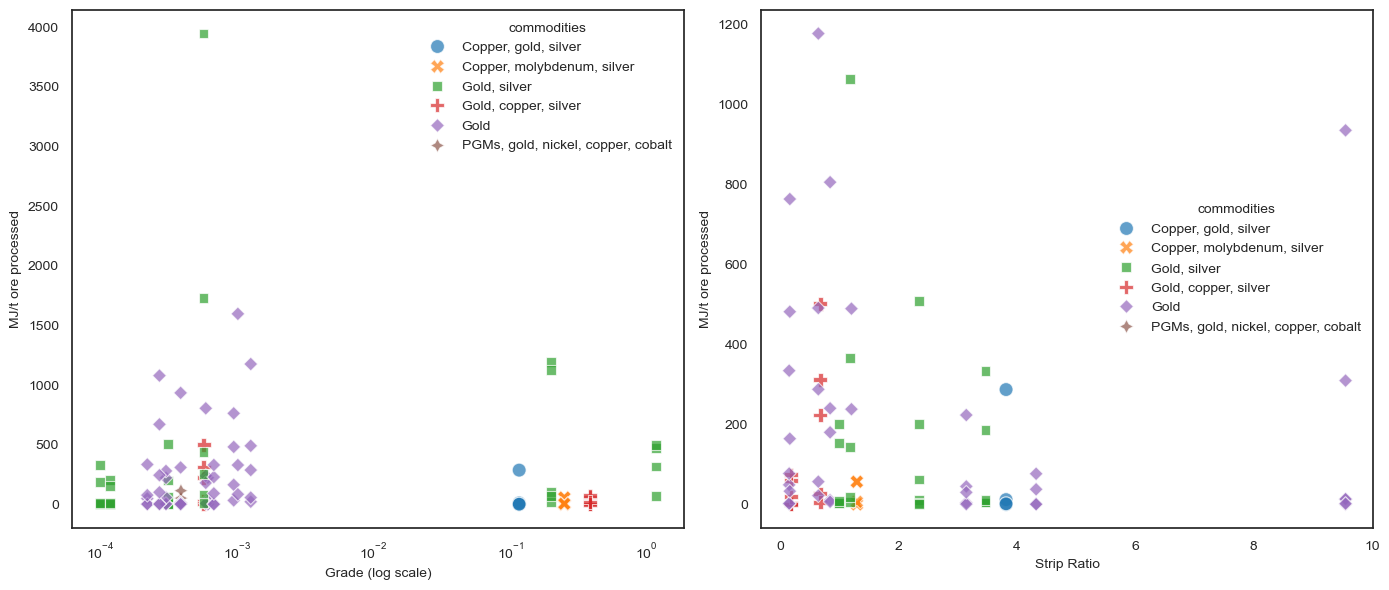

In [174]:
plot_energy_correlations(df, save_path=r'results/parametrization/energy_correlations.png', dpi=600)

## Other plot

In [51]:
energy_df_best_mj_norm_agg

,main_id,facility_group_id,company_id,year,flow_type,subflow_type_agg,value_normalized_sum
0,BC-MAIN-599152a0,nan,CMP-12afc634,2023,Energy,Diesel,11.798048
1,BC-MAIN-599152a0,nan,CMP-12afc634,2023,Energy,Electricity,286.790500
2,BC-MAIN-599152a0,nan,CMP-12afc634,2023,Energy,Gasoline,0.053627
3,BC-MAIN-599152a0,nan,CMP-12afc634,2023,Energy,LPG-Propane,1.474756
4,BC-MAIN-6b4800fe,nan,CMP-e35f138c,2023,Energy,Diesel,56.121767
...,...,...,...,...,...,...,...
114,nan,GRP-147b3123,CMP-48a36546,2023,Energy,Natural gas,101.223379
115,nan,GRP-14bfbb82,CMP-4a73c5f8,2023,Energy,Diesel,1079.139344
116,nan,GRP-14bfbb82,CMP-4a73c5f8,2023,Energy,Electricity,1597.172430
117,nan,GRP-14bfbb82,CMP-4a73c5f8,2023,Energy,LPG-Propane,329.319672


In [53]:
main_best_df

,main_id,facility_name,facility_group_id,facility_group_name,company_id,company_name,city,province,geometry,status,...,mining_processing_type,commodity_group,commodities,owner(s),operator(s),operation_periods,company_URL,facility_URL,MDO_URL,source_id
3,NU-MAIN-4ea8ac9d,Amaruq,GRP-0a2c0d69,Meadowbank complex,CMP-6265c407,Agnico Eagle Mines Limited,Baker Lake,Nunavut,POINT (-96.697 65.415),active_facility,...,"Open-pit, underground",Precious metals,Gold,Agnico Eagle Mines Limited (100%),Agnico Eagle Mines Limited,2019–open,https://agnicoeagle.com/Home/default.aspx,https://www.agnicoeagle.com/English/operations...,https://miningdataonline.com/property/46/LaRon...,https://open.canada.ca/data/en/dataset/000183e...
4,QC-MAIN-e7e6a960,Canadian Malartic,nan,NaN,CMP-6265c407,Agnico Eagle Mines Limited,Malartic,Quebec,POINT (-78.130824 48.122223),active_facility,...,"Open-pit, concentrator",Precious metals,"Gold, silver",Agnico Eagle Mines Limited (100%),Agnico Eagle Mines Limited,1935–1965; 2011–open,https://agnicoeagle.com/Home/default.aspx,https://www.agnicoeagle.com/English/operations...,https://miningdataonline.com/property/13/Detou...,https://open.canada.ca/data/en/dataset/000183e...
5,ON-MAIN-aeafbb59,Detour Lake,nan,NaN,CMP-6265c407,Agnico Eagle Mines Limited,Northeast of Cochrane,Ontario,POINT (-79.717631 50.018143),active_facility,...,"Open-pit, concentrator",Precious metals,Gold,Agnico Eagle Mines Limited (100%),Agnico Eagle Mines Limited,1983–open,https://agnicoeagle.com/Home/default.aspx,https://www.agnicoeagle.com/English/operations...,https://miningdataonline.com/property/959/Meli...,https://open.canada.ca/data/en/dataset/000183e...
9,NU-MAIN-730aefe3,Meadowbank,GRP-0a2c0d69,Meadowbank complex,CMP-6265c407,Agnico Eagle Mines Limited,Baker Lake,Nunavut,POINT (-96.071313 65.0199956),active_facility,...,Concentrator,Precious metals,Gold,Agnico Eagle Mines Limited (100%),Agnico Eagle Mines Limited,2010–open,https://agnicoeagle.com/Home/default.aspx,https://www.agnicoeagle.com/English/operations...,https://miningdataonline.com/property/453/Maca...,https://open.canada.ca/data/en/dataset/000183e...
10,NU-MAIN-8b0264c9,Meliadine,nan,NaN,CMP-6265c407,Agnico Eagle Mines Limited,Rankin Inlet,Nunavut,POINT (-92.220206 63.031529),active_facility,...,"Open-pit, underground, concentrator",Precious metals,Gold,Agnico Eagle Mines Limited (100%),Agnico Eagle Mines Limited,2019–open,https://agnicoeagle.com/Home/default.aspx,https://www.agnicoeagle.com/English/operations...,https://miningdataonline.com/property/44/Golde...,https://open.canada.ca/data/en/dataset/000183e...
13,ON-MAIN-687b8c8d,Island,nan,NaN,CMP-3a4ccc7f,Alamos Gold Inc,Dubreuilville,Ontario,POINT (-84.449604 48.285667),active_facility,...,"Underground, concentrator",Precious metals,Gold,Alamos Gold Inc (100%),Alamos Gold Inc,2007–open,https://alamosgold.com,https://www.alamosgold.com/operations/producin...,https://miningdataonline.com/property/1484/you...,https://open.canada.ca/data/en/dataset/000183e...
14,ON-MAIN-7607a50e,Young-Davidson,nan,NaN,CMP-3a4ccc7f,Alamos Gold Inc,Matachewan,Ontario,POINT (-80.67444 47.94667),active_facility,...,"Underground, concentrator",Precious metals,Gold,Alamos Gold Inc (100%),Alamos Gold Inc,1917–1957; 2010–open,https://alamosgold.com,https://www.alamosgold.com/operations/producin...,https://miningdataonline.com/property/7/Island...,https://open.canada.ca/data/en/dataset/000183e...
35,ON-MAIN-6e9be24e,Hemlo (Williams),nan,NaN,CMP-84fc7d46,Baffinland Iron Mines Corporation,Marathon,Ontario,POINT (-85.91598 48.695726),active_facility,...,"Open-pit, underground, concentrator",Precious metals,Gold,Barrick Gold Corporation (100%),Barrick Gold Corporation,1985–open,https://www.barrick.com/English/home/default.aspx,https://www.barrick.com/English/operations/hem...,https://miningdataonline.com/property/49/Hemlo...,https://open.canada.ca/data/en/dataset/000183e...
54,BC-MAIN-ed23117f,Mount Milligan,nan,NaN,CMP-fa032e20,Centerra Gold Inc,Fort St. Jam

In [45]:
energy_plot_df = merge_without_suffixes(energy_df_best_mj_norm_agg, archetypes_best, keys=("main_id", "facility_group_id"), how="left")

In [46]:
energy_plot_df = merge_without_suffixes(energy_plot_df, main_best_df, keys=("main_id", "facility_group_id"), how="left")

C:\Users\mp_ma\OneDrive - polymtlus\Desktop\POST_DOC\Project\regionalized_lci_mineral\some_functions.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mp_ma\OneDrive - polymtlus\Desktop\POST_DOC\Project\regionalized_lci_mineral\some_functions.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
energy_plot_df

,main_id,facility_group_id,company_id,year,flow_type,subflow_type_agg,value_normalized_sum,ore_type,mining_method,mining_submethod,...,mining_processing_type,commodity_group,commodities,owner(s),operator(s),operation_periods,company_URL,facility_URL,MDO_URL,source_id
0,BC-MAIN-599152a0,nan,CMP-12afc634,2023,Energy,Diesel,11.798048,Sulfide,Concentrator,NaN,...,"Open-pit, concentrator",Base metals,"Copper, gold, silver",Hudbay Minerals Inc (100%),Copper Mountain Mine Ltd,1884–1958; 2011–open,https://hudbayminerals.com/canada/default.aspx,-,https://miningdataonline.com/property/1/copper...,https://open.canada.ca/data/en/dataset/000183e...
1,BC-MAIN-599152a0,nan,CMP-12afc634,2023,Energy,Electricity,286.790500,Sulfide,Concentrator,NaN,...,"Open-pit, concentrator",Base metals,"Copper, gold, silver",Hudbay Minerals Inc (100%),Copper Mountain Mine Ltd,1884–1958; 2011–open,https://hudbayminerals.com/canada/default.aspx,-,https://miningdataonline.com/property/1/copper...,https://open.canada.ca/data/en/dataset/000183e...
2,BC-MAIN-599152a0,nan,CMP-12afc634,2023,Energy,Gasoline,0.053627,Sulfide,Concentrator,NaN,...,"Open-pit, concentrator",Base metals,"Copper, gold, silver",Hudbay Minerals Inc (100%),Copper Mountain Mine Ltd,1884–1958; 2011–open,https://hudbayminerals.com/canada/default.aspx,-,https://miningdataonline.com/property/1/copper...,https://open.canada.ca/data/en/dataset/000183e...
3,BC-MAIN-599152a0,nan,CMP-12afc634,2023,Energy,LPG-Propane,1.474756,Sulfide,Concentrator,NaN,...,"Open-pit, concentrator",Base metals,"Copper, gold, silver",Hudbay Minerals Inc (100%),Copper Mountain Mine Ltd,1884–1958; 2011–open,https://hudbayminerals.com/canada/default.aspx,-,https://miningdataonline.com/property/1/copper...,https://open.canada.ca/data/en/dataset/000183e...
4,BC-MAIN-6b4800fe,nan,CMP-e35f138c,2023,Energy,Diesel,56.121767,Sulfide,"Open-pit, concentrator",Surface – Truck & Shovel,...,"Open-pit, concentrator",Base metals,"Copper, molybdenum, silver",Taseko Mines Limited (100%),NaN,1972–1998; 2004–open,https://www.tasekomines.com/,https://www.tasekomines.com/properties/gibralt...,https://miningdataonline.com/property/2/Gibral...,https://open.canada.ca/data/en/dataset/000183e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,nan,GRP-147b3123,CMP-48a36546,2023,Energy,Natural gas,101.223379,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,nan,GRP-14bfbb82,CMP-4a73c5f8,2023,Energy,Diesel,1079.139344,Sulfide,Concentrator,Underground – Stoping – Long-Hole Stoping,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,nan,GRP-14bfbb82,CMP-4a73c5f8,2023,Energy,Electricity,1597.172430,Sulfide,Concentrator,Underground – Stoping – Long-Hole Stoping,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,nan,GRP-14bfbb82,CMP-4a73c5f8,2023,Energy,LPG-Propane,329.319672,Sulfide,Concentrator,Underground – Stoping – Long-Hole Stoping,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
def stripplot_with_barplot(
    data, x, y, y_legend=None, hue=None, style=None, log_scale=False,
    outfile=None, dpi=600
):
    """
    Create a scatterplot with overlaid barplot for mean/median.
    Optionally save as high-resolution figure.
    """
    fig, ax = plt.subplots(figsize=(12, 6))

    # Scatterplot (replaces stripplot)
    sns.scatterplot(
        data=data,
        x=x,
        y=y,
        hue=hue,
        style=style,
        ax=ax
    )

    # Barplot for mean/median
    sns.barplot(
        data=data,
        x=x,
        y=y,
        hue=hue,
        estimator='median',
        errorbar=None,
        alpha=0.3,
        width=0.6,
        ax=ax
    )

    # Add vertical separators between x categories
    for i in range(len(data[x].unique()) - 1):
        ax.axvline(i + 0.5, color="grey", linestyle="--", alpha=0.4)

    # Log scale if requested
    if log_scale:
        ax.set_yscale("log")

    # Formatting
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_title(
        f"Plot: {y} by {x}" +
        (f" (colored by {hue})" if hue else "") +
        (f" (styled by {style})" if style else "")
    )
    ax.set_xlabel('')
    ax.set_ylabel(y_legend)

    if hue or style:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        ax.legend_.remove()

    fig.tight_layout()

    # Save if requested
    if outfile:
        fig.savefig(outfile, dpi=dpi, bbox_inches="tight", format="pdf")
        print(f"Saved figure to {outfile} (dpi={dpi})")

    plt.show()

C:\Users\mp_ma\AppData\Local\Temp\ipykernel_16552\2049756560.py:43: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



Saved figure to results/parametrization/stripplot_energy.pdf (dpi=600)


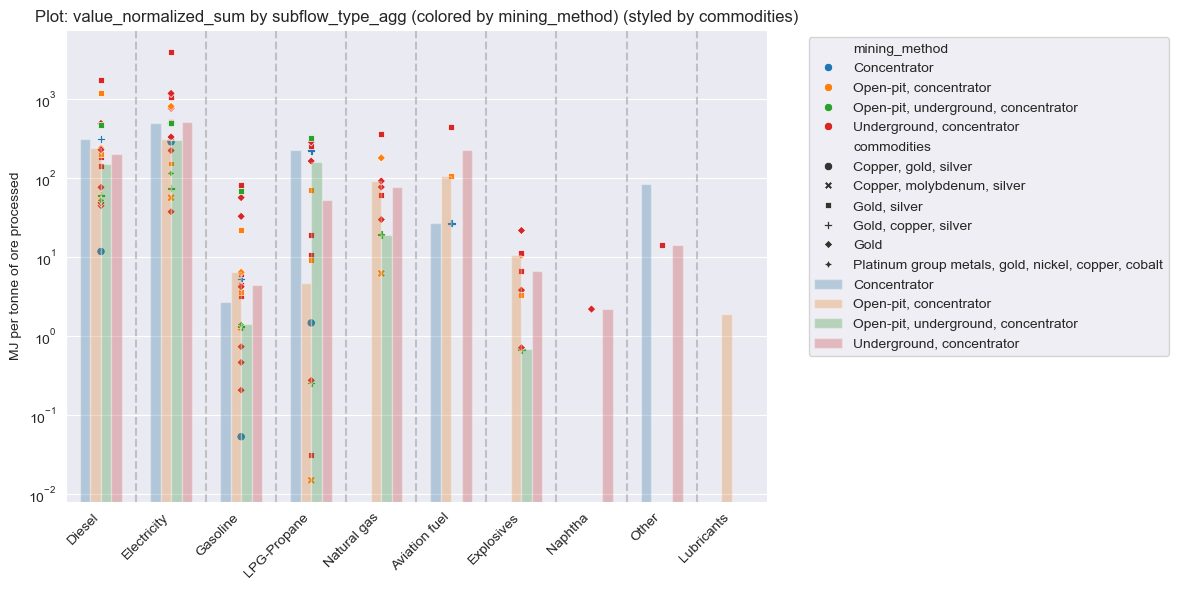

In [50]:
stripplot_energy_df = stripplot_with_barplot(
    energy_plot_df,
    x="subflow_type_agg",
    y="value_normalized_sum",
    y_legend="MJ per tonne of ore processed",
    hue="mining_method",
    style='commodities',
    log_scale=True,
    outfile="results/parametrization/stripplot_energy.pdf",
    dpi=600
)

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

def generate_energy_plot_streamlined(
    df: pd.DataFrame,
    grouping_column: str = 'mining_method',
    plot_type: str = 'mj',
    output_filename: str = 'results/parametrization/energy_plot.png',
    dpi: int = 600,
    figsize: tuple = (20, 10)
):
    """
    Génère et enregistre un diagramme à barres empilées pour les données énergétiques.
    Les commodités sont affichées par ordre alphabétique sur l'axe des x.

    Args:
        df (pd.DataFrame): DataFrame d'entrée contenant les données énergétiques.
        grouping_column (str): Nom de la colonne pour le regroupement des barres (par ex., 'mining_method').
        plot_type (str): 'mj' pour l'énergie totale, 'percentage' pour la répartition en pourcentage.
        plot_title (str, optional): Titre personnalisé pour le diagramme.
        output_filename (str): Nom du fichier pour le diagramme enregistré.
        dpi (int): DPI pour l'image enregistrée.
        figsize (tuple): Taille de la figure.
    """
    # Combinaison de 'main_id' et 'facility_group_id' en une seule colonne 'facility_id'
    df['facility_id'] = df['main_id'].fillna(df['facility_group_id'])

    # Gérer les valeurs manquantes pour un affichage propre
    df['commodities'] = df['commodities'].fillna('Unspecified')
    df['subflow_type_agg'] = df['subflow_type_agg'].fillna('Unspecified')
    df[grouping_column] = df[grouping_column].fillna('Unspecified')

    # Grouper les données par la colonne de regroupement, l'ID de l'installation et le sous-type
    grouped_df = df.groupby([grouping_column, 'facility_id', 'subflow_type_agg'])['value_normalized_sum'].sum().unstack(fill_value=0, level='subflow_type_agg')

    # Obtenir la commodité pour chaque ID d'installation
    commodity_map = df.groupby('facility_id')['commodities'].first()

    # Créer les étiquettes de l'axe des x en combinant la commodité et l'ID
    x_labels_raw = [f'{commodity_map.get(idx[1])} ({idx[1]})' for idx in grouped_df.index]

    # Créer un DataFrame temporaire pour le tri
    temp_df = grouped_df.copy()
    temp_df['commodities'] = [commodity_map.get(idx[1]) for idx in temp_df.index]

    # Trier le DataFrame par la colonne 'commodities' par ordre alphabétique
    temp_df = temp_df.sort_values(by='commodities', kind='stable')

    # Mettre à jour grouped_df et les étiquettes de l'axe des x en fonction du tri
    grouped_df = temp_df.drop(columns=['commodities'])
    x_axis_labels = [f'{commodity_map.get(idx[1])}' for idx in grouped_df.index]

    # Calculer les pourcentages si nécessaire
    if plot_type == 'percentage':
        grouped_df = grouped_df.apply(lambda x: x / x.sum(), axis=1)

    # Trier les colonnes pour un empilement cohérent
    grouped_df = grouped_df.reindex(sorted(grouped_df.columns), axis=1)

    # Créer le graphique
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

    grouped_df.plot(kind='bar', stacked=True, ax=ax)

    # Personnaliser le graphique
    ylabel = 'Energy (MJ)' if plot_type == 'mj' else 'Percentage (%)'
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xlabel('', fontsize=12)
    ax.set_xticklabels(x_axis_labels, rotation=90, ha='center', fontsize=12, weight='bold')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    if plot_type == 'percentage':
        ax.yaxis.set_major_formatter(PercentFormatter(1))

    # Ajouter des lignes verticales et des étiquettes pour le regroupement
    group_counts = grouped_df.index.get_level_values(grouping_column).value_counts().sort_index()
    current_x = -0.5
    for group, count in group_counts.items():
        ax.axvline(x=current_x + count, color='gray', linestyle='--', linewidth=1)
        ax.text(x=current_x + count / 2, y=ax.get_ylim()[1] * 1.05, s=group, ha='center', va='bottom', fontsize=12, weight='bold')
        current_x += count

    plt.tight_layout()
    plt.savefig(output_filename, dpi=dpi, bbox_inches='tight')
    plt.close(fig)
    print(f"Plot saved as {output_filename}")

In [112]:
df_to_plot = pd.read_csv(r'results/parametrization/df_to_plot.csv')

In [113]:
generate_energy_plot_streamlined(df_to_plot, plot_type='mj', output_filename='results/parametrization/energy_mj_by_commodity.png')

Plot saved as results/parametrization/energy_mj_by_commodity.png


In [114]:
generate_energy_plot_streamlined(df_to_plot, plot_type='percentage', output_filename='results/parametrization/energy_percentage_by_commodity.png')

Plot saved as results/parametrization/energy_percentage_by_commodity.png


# Build relationships for parametrization

In [95]:
import pandas as pd
import numpy as np
from scipy import stats

def _safe_loglik(x, rv):
    """Return finite log-likelihood sum for fitted frozen rv."""
    logpdf = rv.logpdf(x)
    logpdf = logpdf[np.isfinite(logpdf)]
    return float(np.sum(logpdf)) if logpdf.size else -np.inf

def _eval_fit(name, rv, x, k):
    """Compute LL, AIC, BIC, KS p for a frozen rv with k free parameters."""
    n = len(x)
    ll = _safe_loglik(x, rv)
    aic = 2 * k - 2 * ll
    bic = k * np.log(n) - 2 * ll
    ks_stat, ks_p = stats.kstest(x, rv.cdf)
    return dict(dist=name, ll=ll, aic=aic, bic=bic, ks_p=ks_p, rv=rv, k=k)

def _fit_candidates(x, candidates=("lognormal", "gamma", "weibull_min", "normal")):
    """Fit candidate distributions on strictly positive x."""
    x = np.asarray(x, dtype=float)
    results = []
    # LOGNORMAL: s (sigma), scale=exp(mu), loc fixed 0 => k=2
    if "lognormal" in candidates:
        try:
            s, loc, scale = stats.lognorm.fit(x, floc=0)
            rv = stats.lognorm(s=s, loc=0, scale=scale)
            results.append(_eval_fit("lognormal", rv, x, k=2))
        except Exception:
            pass
    # GAMMA: shape a, scale theta, loc fixed 0 => k=2
    if "gamma" in candidates:
        try:
            a, loc, scale = stats.gamma.fit(x, floc=0)
            rv = stats.gamma(a=a, loc=0, scale=scale)
            results.append(_eval_fit("gamma", rv, x, k=2))
        except Exception:
            pass
    # WEIBULL(min): c (shape), scale, loc fixed 0 => k=2
    if "weibull_min" in candidates:
        try:
            c, loc, scale = stats.weibull_min.fit(x, floc=0)
            rv = stats.weibull_min(c=c, loc=0, scale=scale)
            results.append(_eval_fit("weibull_min", rv, x, k=2))
        except Exception:
            pass
    # NORMAL: mu, sigma => k=2
    if "normal" in candidates:
        try:
            mu, sigma = stats.norm.fit(x)
            rv = stats.norm(loc=mu, scale=max(sigma, 1e-12))
            results.append(_eval_fit("normal", rv, x, k=2))
        except Exception:
            pass
    # Sort by BIC then AIC
    results.sort(key=lambda d: (d["bic"], d["aic"]))
    return results

def _readable_params(best):
    """Human-readable parameter summary by distribution."""
    rv = best["rv"]
    name = best["dist"]
    args = getattr(rv, "args", ())
    kw = getattr(rv, "kwds", {})
    if name == "lognormal":
        s = kw.get("s", args[0] if args else None)
        scale = kw.get("scale", args[-1] if args else None)
        mu = np.log(scale) if scale is not None else np.nan
        return dict(mu_log=mu, sigma_log=s, scale=scale)
    elif name == "gamma":
        a = kw.get("a", args[0] if args else None)
        scale = kw.get("scale", args[-1] if args else None)
        return dict(shape=a, scale=scale)
    elif name == "weibull_min":
        c = kw.get("c", args[0] if args else None)
        scale = kw.get("scale", args[-1] if args else None)
        return dict(shape=c, scale=scale)
    elif name == "normal":
        loc = kw.get("loc", 0.0)
        scale = kw.get("scale", np.nan)
        return dict(mu=loc, sigma=scale)
    return dict()

def fit_parametric_distributions(
    df,
    value_col="value_normalized_sum",
    group_cols=("commodity", "mining_method", "subflow_type_agg"),
    min_n=6,
    winsorize_pct=None,
    candidates=("lognormal", "gamma", "weibull_min", "normal"),
):
    """
    Fit parametric distributions to positive data by group.
    Returns a DataFrame with:
        group columns, n, min, max, mean, std, p05, p50, p95,
        best_dist, AIC, BIC, KS_p, params_json (readable dict)
    """
    if isinstance(group_cols, str):
        group_cols = [group_cols]
    data = df.copy()
    if value_col not in data.columns:
        raise ValueError(f"Missing column '{value_col}'")
    for gc in group_cols:
        if gc not in data.columns:
            raise ValueError(f"Missing group column '{gc}'")
    data = data[np.isfinite(data[value_col]) & (data[value_col] > 0)].copy()
    if winsorize_pct is not None:
        low_p, high_p = winsorize_pct
        def _wins_g(g):
            lo = g[value_col].quantile(low_p) if low_p else g[value_col].min()
            hi = g[value_col].quantile(1 - high_p) if high_p else g[value_col].max()
            g[value_col] = g[value_col].clip(lo, hi)
            return g
        data = data.groupby(list(group_cols), group_keys=False).apply(_wins_g)

    records = []
    for gkey, g in data.groupby(list(group_cols)):
        x = g[value_col].dropna().values
        n = len(x)
        if n == 0:
            rec = {gc: gv for gc, gv in zip(group_cols, gkey)}
            rec.update(dict(n=0, min=np.nan, max=np.nan, mean=np.nan, std=np.nan, p05=np.nan, p50=np.nan, p95=np.nan,
                            best_dist="no_data", AIC=np.nan, BIC=np.nan, KS_p=np.nan, params_json={}))
            records.append(rec)
            continue
        p05, p50, p95 = np.percentile(x, [5, 50, 95])
        xmin, xmax, xmean, xstd = float(np.min(x)), float(np.max(x)), float(np.mean(x)), float(np.std(x))
        if n < min_n:
            rec = {gc: gv for gc, gv in zip(group_cols, gkey)}
            rec.update(dict(n=n, min=xmin, max=xmax, mean=xmean, std=xstd, p05=p05, p50=p50, p95=p95,
                            best_dist="insufficient_data", AIC=np.nan, BIC=np.nan, KS_p=np.nan, params_json={}))
            records.append(rec)
            continue
        fits = _fit_candidates(x, candidates=candidates)
        if not fits:
            rec = {gc: gv for gc, gv in zip(group_cols, gkey)}
            rec.update(dict(n=n, min=xmin, max=xmax, mean=xmean, std=xstd, p05=p05, p50=p50, p95=p95,
                            best_dist="fit_failed", AIC=np.nan, BIC=np.nan, KS_p=np.nan, params_json={}))
            records.append(rec)
            continue
        best = fits[0]
        params_dict = _readable_params(best)
        rec = {gc: gv for gc, gv in zip(group_cols, gkey)}
        rec.update(dict(
            n=n, min=xmin, max=xmax, mean=xmean, std=xstd, p05=p05, p50=p50, p95=p95,
            best_dist=best["dist"], AIC=best["aic"], BIC=best["bic"], KS_p=best["ks_p"],
            params_json=params_dict
        ))
        records.append(rec)

    return pd.DataFrame.from_records(records).sort_values(list(group_cols) + ["best_dist"])


In [99]:
parametrization_distributions_nrj = fit_parametric_distributions(
    energy_plot_df,
    value_col="value_normalized_sum",
    group_cols=("commodities", "mining_method", "subflow_type_agg"),
    min_n=6,
    winsorize_pct=(0.01, 0.01),
    candidates=("lognormal", "gamma", "weibull_min", "normal")
)


C:\Users\mp_ma\AppData\Local\Temp\ipykernel_16860\3787692585.py:115: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby(list(group_cols), group_keys=False).apply(_wins_g)


In [101]:
parametrization_distributions_nrj.to_csv(r'results/parametrization/parametrization_distributions_nrj.csv', index=False)

# Grade parametrization

In [103]:
au_ids = [
'ON-MAIN-687b8c8d',	#Island
'ON-MAIN-7607a50e',	#Young-Davidson
'QC-MAIN-f9e41c2a',	#Lamaque
'GRP-0d911886', #Porcupine #3 sites
'GRP-147b3123', #Timmins Operation #2 sites # Also silver in production
'GRP-14bfbb82', #Seabee Gold Operation #2 sites
'QC-MAIN-9de9bb0d',	#Kiena
'ON-MAIN-c5fefb01',	#Mishi

# Additional ones, only gold in production_df but not in NRCan
'BC-MAIN-8eb8be0d', #Red Chris
'ON-MAIN-0aadf28f', #Rainy River
'ON-MAIN-538513cd', # Hoyle Pond, Part of Porcupine Complex
'ON-MAIN-fefeaee4', # Musselwhite
'QC-MAIN-02884fb5' #Westwood-Doyon
]

## Prepare data

### Production

In [104]:
production_au = production_table[
    (production_table['main_id'].isin(au_ids) | production_table['facility_group_id'].isin(au_ids))
].copy()

In [105]:
production_au = get_production_data(production_au)

### Energy

In [106]:
energy_au = technosphere_table[
    (technosphere_table['main_id'].isin(au_ids) | technosphere_table['facility_group_id'].isin(au_ids)) &
    (technosphere_table['flow_type'] == 'Energy')
].copy()

In [107]:
energy_au_mj = standardize_energy_to_MJ(energy_au,
                                    subflow_col='subflow_type',
                                    unit_col='unit',
                                    value_col='value',
                                    lhv_table=None)

In [108]:
energy_au_mj.drop(energy_au_mj[energy_au_mj['needs_factor']].index, inplace=True)


In [109]:
energy_au_mj_norm = normalize_by_production(energy_au_mj, production_au, value_col='value_MJ')


In [110]:
energy_au_mj_norm

,technosphere_id,year,flow_type,subflow_type,unit,value,comment,main_id,facility_group_id,company_id,...,value_MJ,unit_source,assumption_note,unit_standard,needs_factor,value_tonnes_main,value_tonnes_group,value_tonnes_match,value_normalized,normalization_key
0,TECH-7607a50e-2023-1,2023,Energy,Electricity consumption|Generated on-site,GJ,717.0,NaN,ON-MAIN-7607a50e,NaN,CMP-3a4ccc7f,...,717000.0,direct_unit,gj→MJ factor=1000.0,MJ,False,439008.0,NaN,439008.0,1.633228,main_id
1,TECH-7607a50e-2023-2,2023,Energy,Diesel,GJ,211308.0,NaN,ON-MAIN-7607a50e,NaN,CMP-3a4ccc7f,...,211308000.0,direct_unit,gj→MJ factor=1000.0,MJ,False,439008.0,NaN,439008.0,481.330636,main_id
2,TECH-7607a50e-2023-3,2023,Energy,Gasoline,GJ,14406.0,NaN,ON-MAIN-7607a50e,NaN,CMP-3a4ccc7f,...,14406000.0,direct_unit,gj→MJ factor=1000.0,MJ,False,439008.0,NaN,439008.0,32.814892,main_id
3,TECH-7607a50e-2023-4,2023,Energy,Propane,GJ,72011.0,NaN,ON-MAIN-7607a50e,NaN,CMP-3a4ccc7f,...,72011000.0,direct_unit,gj→MJ factor=1000.0,MJ,False,439008.0,NaN,439008.0,164.031179,main_id
4,TECH-7607a50e-2023-5,2023,Energy,Electricity consumption,GJ,334179.0,NaN,ON-MAIN-7607a50e,NaN,CMP-3a4ccc7f,...,334179000.0,direct_unit,gj→MJ factor=1000.0,MJ,False,439008.0,NaN,439008.0,761.213919,main_id
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,TECH-c5fefb01-2023-1,2023,Energy,Diesel,kl,1188.0,NaN,ON-MAIN-c5fefb01,NaN,CMP-3d2c4955,...,45856800.0,lhv_factor,diesel MJ/L=38.6,MJ,False,191148.0,NaN,191148.0,239.902065,main_id
79,TECH-c5fefb01-2023-2,2023,Energy,Gasoline,kl,36.0,NaN,ON-MAIN-c5fefb01,NaN,CMP-3d2c4955,...,1231200.0,lhv_factor,gasoline MJ/L=34.2,MJ,False,191148.0,NaN,191148.0,6.441082,main_id
80,TECH-c5fefb01-2023-3,2023,Energy,Explosives,t,506.0,NaN,ON-MAIN-c5fefb01,NaN,CMP-3d2c4955,...,2024000.0,lhv_factor,explosives MJ/kg=4.0 (from t),MJ,False,191148.0,NaN,191148.0,10.588654,main_id
81,TECH-c5fefb01-2023-5,2023,Energy,Electricity consumption|Grid electricity,MWh,32053.5,Given in MW in the Excel file but does not mak...,ON-MAIN-c5fefb01,NaN,CMP-3d2c4955,...,115392600.0,direct_unit,mwh→MJ factor=3600.0,MJ,False,191148.0,NaN,191148.0,603.681964,main_id


In [111]:
# Add a subflow_type_agg column to the energy_std_norm DataFrame based on the dictionnary
energy_au_mj_norm['subflow_type_agg'] = energy_au_mj_norm['subflow_type'].map(subflow_type_agg).fillna(
    energy_au_mj_norm['subflow_type'])
# Group by subflow_type_agg and normalization_key, aggregating the normalized values
energy_au_mj_norm_agg = (
    energy_au_mj_norm
    .groupby(
        [
            'main_id', 'facility_group_id', 'company_id',
            'year', 'flow_type', 'subflow_type_agg'],
        dropna=False, as_index=False
    )
    .agg(value_normalized_sum=('value_normalized', 'sum'))
)

### Biosphere

In [112]:
biosphere_au = env_table[
    env_table['main_id'].isin(au_ids) | env_table['facility_group_id'].isin(au_ids)
].copy()

In [113]:
biosphere_au

,env_id,year,compartment_id,substance_id,flow_direction,release_pathway,unit,value,comment,main_id,facility_group_id,company_id,source_id
19,1754097,2023,comp3c458811,NA - GHG,NaN,NaN,tCO2eq,84511.00036162816,NaN,BC-MAIN-8eb8be0d,NaN,NaN,"Jolleys, M. et al (2024). Mineral Extraction s..."
6614,GHG-10468-2023-1,2023,comp3c458811,NA - GHG,Emission,Unspecified,ktCO2eq,36.87,NaN,ON-MAIN-fefeaee4,NaN,NaN,https://www.canada.ca/en/environment-climate-c...
6631,GHG-10911-2023-1,2023,comp3c458811,NA - GHG,Emission,Unspecified,ktCO2eq,16.42,NaN,QC-MAIN-02884fb5,NaN,NaN,https://www.canada.ca/en/environment-climate-c...
6633,GHG-10917-2023-1,2023,comp3c458811,NA - GHG,Emission,Unspecified,ktCO2eq,20.11,NaN,ON-MAIN-687b8c8d,NaN,NaN,https://www.canada.ca/en/environment-climate-c...
6638,GHG-10924-2023-1,2023,comp3c458811,NA - GHG,Emission,Unspecified,ktCO2eq,53.78,NaN,ON-MAIN-538513cd,NaN,NaN,https://www.canada.ca/en/environment-climate-c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,ENV-687b8c8d-2023-15,2023,comp3c458811,NA - M09,Emission,NaN,t,8.6,NaN,ON-MAIN-687b8c8d,NaN,CMP-3a4ccc7f,SRC_AlamosGoldInc_Data_2023
7011,ENV-687b8c8d-2023-16,2023,comp3c458811,NA - M10,Emission,NaN,t,2.6,NaN,ON-MAIN-687b8c8d,NaN,CMP-3a4ccc7f,SRC_AlamosGoldInc_Data_2023
7012,ENV-687b8c8d-2023-17,2023,comp3c458811,NA - PAH,Emission,NaN,t,38.54224,NaN,ON-MAIN-687b8c8d,NaN,CMP-3a4ccc7f,SRC_AlamosGoldInc_Data_2023
7013,ENV-687b8c8d-2023-18,2023,comp3c458811,NA - SOx,Emission,NaN,t,0.243,NaN,ON-MAIN-687b8c8d,NaN,CMP-3a4ccc7f,SRC_AlamosGoldInc_Data_2023


### Parametrization

In [114]:
ta_au = tech_attributes_table[
    tech_attributes_table['main_id'].isin(au_ids) | tech_attributes_table['facility_group_id'].isin(au_ids)
].copy()

In [115]:
ta_au['value_%'] = ta_au.apply(convert_to_percent, axis=1)
ta_au.drop(columns=['unit', 'value'], inplace=True)

In [116]:
archetypes_au = archetypes_table[
    (archetypes_table['main_id'].isin(au_ids) | archetypes_table['facility_group_id'].isin(au_ids))
].copy()

In [117]:
parametrization_au = merge_without_suffixes(ta_au, archetypes_au, keys=("main_id", "facility_group_id"), how="left")

In [118]:
parametrization_au

,tech_attr_id,year,level,geography,reported_company_nrcan,name,main_id,facility_group_id,company_id,facility_type,...,method,comment,source,source_id,value_%,archetype_id,ore_type,mining_method,mining_submethod,mining_depth
0,TA-fefeaee4-2023-1,2023,Site-specific,Canada,Newmont Corporation,Brucejack,ON-MAIN-fefeaee4,nan,CMP-4a434d72,mining,...,Reported,NaN,Operating_statistics_2023,SRC_NewmontCorporation_Operating_statistics_2023,0.000568,ARCH-fefeaee4-1,Oxide or Sulfide,"Underground, concentrator",Underground – Stoping – Long-Hole Stoping,NaN
1,TA-fefeaee4-2023-2,2023,Site-specific,Canada,Newmont Corporation,Brucejack,ON-MAIN-fefeaee4,nan,CMP-4a434d72,mining,...,Reported,NaN,Operating_statistics_2023,SRC_NewmontCorporation_Operating_statistics_2023,96.000000,ARCH-fefeaee4-1,Oxide or Sulfide,"Underground, concentrator",Underground – Stoping – Long-Hole Stoping,NaN
2,TA-9de9bb0d-2023-1,2023,Site-specific,Canada,Wesdome Gold Mines Ltd,Eagle River,QC-MAIN-9de9bb0d,nan,CMP-3d2c4955,mining,...,Reported,NaN,2024-MDA-FINAL,SRC_WesdomeGoldMinesLtd_2024-MDA-FINAL,0.001260,ARCH-9de9bb0d-1,Sulfide,"Underground, concentrator",Underground – Stoping – Long-Hole Stoping,NaN
3,TA-9de9bb0d-2023-2,2023,Site-specific,Canada,Wesdome Gold Mines Ltd,Eagle River,QC-MAIN-9de9bb0d,nan,CMP-3d2c4955,mining,...,Reported,NaN,2024-MDA-FINAL,SRC_WesdomeGoldMinesLtd_2024-MDA-FINAL,96.900000,ARCH-9de9bb0d-1,Sulfide,"Underground, concentrator",Underground – Stoping – Long-Hole Stoping,NaN
4,TA-538513cd-2023-1,2023,Site-specific,Canada,Newmont Corporation,Éléonore,ON-MAIN-538513cd,nan,CMP-4a434d72,mining,...,Reported,NaN,Operating_statistics_2023,SRC_NewmontCorporation_Operating_statistics_2023,0.000479,ARCH-538513cd-1,NaN,"Underground, concentrator",Underground – Stoping – Long-Hole Stoping,NaN
5,TA-538513cd-2023-2,2023,Site-specific,Canada,Newmont Corporation,Éléonore,ON-MAIN-538513cd,nan,CMP-4a434d72,mining,...,Reported,NaN,Operating_statistics_2023,SRC_NewmontCorporation_Operating_statistics_2023,91.000000,ARCH-538513cd-1,NaN,"Underground, concentrator",Underground – Stoping – Long-Hole Stoping,NaN
6,TA-7607a50e-2023-1,2023,Site-specific,Canada,Alamos Gold Inc,Island,ON-MAIN-7607a50e,nan,CMP-3a4ccc7f,mining,...,Reported,Assumed g/t,Data_2023.xlsx,SRC_AlamosGoldInc_Data_2023,0.000948,ARCH-7607a50e-1,Sulfide,"Underground, concentrator",Underground – Stoping – Long-Hole Stoping,NaN
7,TA-7607a50e-2023-2,2023,Site-specific,Canada,Alamos Gold Inc,Island,ON-MAIN-7607a50e,nan,CMP-3a4ccc7f,mining,...,Reported,NaN,Data_2023.xlsx,SRC_AlamosGoldInc_Data_2023,97.000000,ARCH-7607a50e-1,Sulfide,"Underground, concentrator",Underground – Stoping – Long-Hole Stoping,NaN
8,TA-7607a50e-2023-3,2023,Site-specific,Canada,Alamos Gold Inc,Island,ON-MAIN-7607a50e,nan,CMP-3a4ccc7f,mining,...,Reported,Assumed g/t,Data_2023.xlsx,SRC_AlamosGoldInc_Data_2023,0.000943,ARCH-7607a50e-1,Sulfide,"Underground, concentrator",Underground – Stoping – Long-Hole Stoping,NaN
9,TA-c5fefb01-2023-1,2023,Site-specific,Canada,Wesdome Gold Mines Ltd,Kiena,ON-MAIN-c5fefb01,nan,CMP-3d2c4955,mining,...,Reported,NaN,2024-MDA-FINAL,SRC_WesdomeGoldMinesLtd_2024-MDA-FINAL,0.000590,ARCH-c5fefb01-1,Sulfide,"Open-pit, concentrator",Underground – Stoping – Long-Hole Stoping,NaN


## Plot data

In [119]:
energy_grade = merge_without_suffixes(energy_au_mj_norm_agg, parametrization_au, keys=("main_id", "facility_group_id"), how="left")

In [120]:
energy_grade

,main_id,facility_group_id,company_id,year,flow_type,subflow_type_agg,value_normalized_sum,tech_attr_id,level,geography,...,method,comment,source,source_id,value_%,archetype_id,ore_type,mining_method,mining_submethod,mining_depth
0,BC-MAIN-8eb8be0d,nan,CMP-4a434d72,2023,Energy,Aviation fuel,26.900028,TA-8eb8be0d-2023-1,Site-specific,Canada,...,Reported,NaN,Operating_statistics_2024,SRC_NewmontCorporation_Operating_statistics_2024,0.000570,ARCH-8eb8be0d-1,Sulfide,Concentrator,Underground – Stoping – Long-Hole Stoping,NaN
1,BC-MAIN-8eb8be0d,nan,CMP-4a434d72,2023,Energy,Diesel,311.658659,TA-8eb8be0d-2023-1,Site-specific,Canada,...,Reported,NaN,Operating_statistics_2024,SRC_NewmontCorporation_Operating_statistics_2024,0.000570,ARCH-8eb8be0d-1,Sulfide,Concentrator,Underground – Stoping – Long-Hole Stoping,NaN
2,BC-MAIN-8eb8be0d,nan,CMP-4a434d72,2023,Energy,Electricity,501.149596,TA-8eb8be0d-2023-1,Site-specific,Canada,...,Reported,NaN,Operating_statistics_2024,SRC_NewmontCorporation_Operating_statistics_2024,0.000570,ARCH-8eb8be0d-1,Sulfide,Concentrator,Underground – Stoping – Long-Hole Stoping,NaN
3,BC-MAIN-8eb8be0d,nan,CMP-4a434d72,2023,Energy,Gasoline,5.289528,TA-8eb8be0d-2023-1,Site-specific,Canada,...,Reported,NaN,Operating_statistics_2024,SRC_NewmontCorporation_Operating_statistics_2024,0.000570,ARCH-8eb8be0d-1,Sulfide,Concentrator,Underground – Stoping – Long-Hole Stoping,NaN
4,BC-MAIN-8eb8be0d,nan,CMP-4a434d72,2023,Energy,LPG-Propane,223.630223,TA-8eb8be0d-2023-1,Site-specific,Canada,...,Reported,NaN,Operating_statistics_2024,SRC_NewmontCorporation_Operating_statistics_2024,0.000570,ARCH-8eb8be0d-1,Sulfide,Concentrator,Underground – Stoping – Long-Hole Stoping,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,nan,GRP-147b3123,CMP-48a36546,2023,Energy,Natural gas,101.223379,TA-GRP-147b3123-2023-1,Facility-group,Canada,...,Reported,Assumed ore grade,Financial_results,SRC_PanAmericanSilverCorp._Financial_results,0.000270,NaN,NaN,NaN,NaN,NaN
60,nan,GRP-14bfbb82,CMP-4a73c5f8,2023,Energy,Diesel,1079.139344,TA-GRP-14bfbb82-2023-1,Facility-group,Canada,...,Reported,NaN,FY2024,SRC_SSRMiningInc_FY2024,0.001014,ARCH-GRP-14bfbb82-1,Sulfide,Concentrator,Underground – Stoping – Long-Hole Stoping,NaN
61,nan,GRP-14bfbb82,CMP-4a73c5f8,2023,Energy,Electricity,1597.172430,TA-GRP-14bfbb82-2023-1,Facility-group,Canada,...,Reported,NaN,FY2024,SRC_SSRMiningInc_FY2024,0.001014,ARCH-GRP-14bfbb82-1,Sulfide,Concentrator,Underground – Stoping – Long-Hole Stoping,NaN
62,nan,GRP-14bfbb82,CMP-4a73c5f8,2023,Energy,LPG-Propane,329.319672,TA-GRP-14bfbb82-2023-1,Facility-group,Canada,...,Reported,NaN,FY2024,SRC_SSRMiningInc_FY2024,0.001014,ARCH-GRP-14bfbb82-1,Sulfide,Concentrator,Underground – Stoping – Long-Hole Stoping,NaN


In [122]:
energy_grade.to_csv(r'results/parametrization/energy_grade.csv', index=False)

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_energy_by_grade(
    data,
    x="value_%",
    y="value_normalized_sum",
    hue="mining_method",
    log_scale=False,
    outfile=None,
    dpi=600,
    alpha=0.7,
    s=30
):
    """
    Plot the sum of subflow_type_agg per facility/main_id as points,
    colored by mining method.
    """
    # Sum value_normalized_sum per facility/main_id
    plot_data = data.groupby(["main_id", "mining_method", x])[y].sum().reset_index()

    fig, ax = plt.subplots(figsize=(12, 6))

    # Scatterplot
    sns.scatterplot(
        data=plot_data,
        x=x,
        y=y,
        hue=hue,
        ax=ax,
        alpha=alpha,
        s=s
    )

    # Log scale if requested
    if log_scale:
        ax.set_yscale("log")

    # Formatting
    ax.set_title(f"Energy by Ore Grade (colored by {hue})")
    ax.set_xlabel(x)
    ax.set_ylabel(y)

    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    fig.tight_layout()

    # Save if requested
    if outfile:
        fig.savefig(outfile, dpi=dpi, bbox_inches="tight", format="pdf")
        print(f"Saved figure to {outfile} (dpi={dpi})")

    plt.show()


Saved figure to results/parametrization/energy_by_grade.pdf (dpi=600)


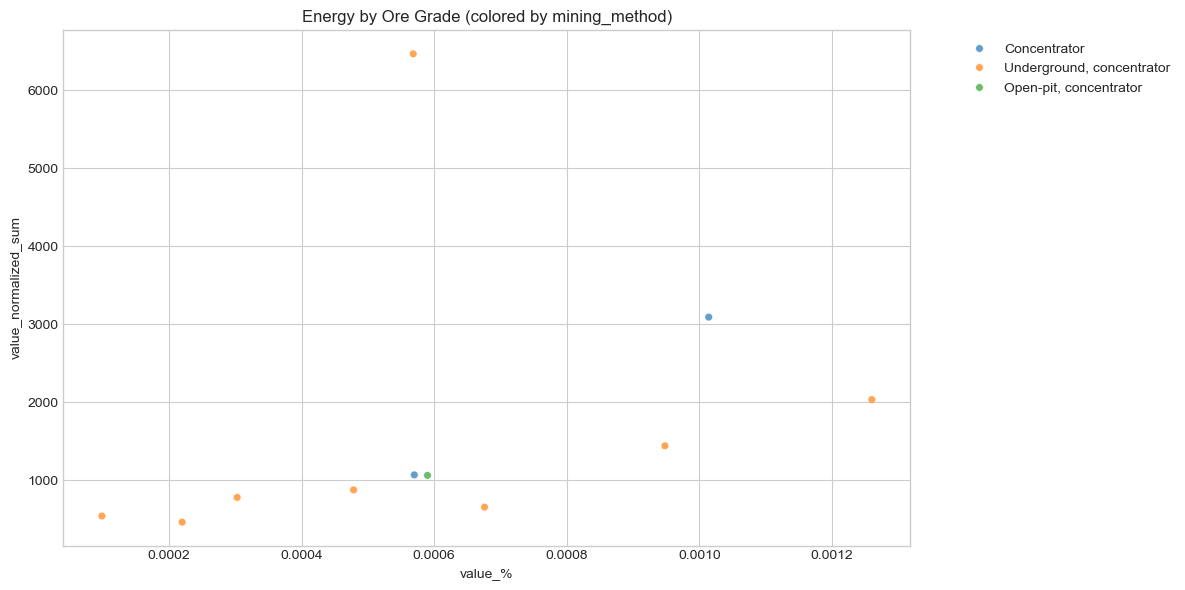

In [135]:
plot_energy_by_grade(
    energy_grade,
    x="value_%",
    y="value_normalized_sum",
    hue="mining_method",
    log_scale=False,
    outfile="results/parametrization/energy_by_grade.pdf",
    dpi=600,
    alpha=0.7,
    s=30
)

